# 1 Housekeeping

### 1.1 Load libraries

In [ ]:
#basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans 

from sklearn.preprocessing import StandardScaler
import missingno as msno

In [ ]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 200)

### 1.2 Custom functions

In [ ]:
#custom function that creates a numerical data quality report
def numerical_dqr(df):
  
  #select numerical columns
  numerical = df.select_dtypes(include = ['int', 'Int64', 'float']).columns.tolist()
  
  #data type
  data_types = pd.DataFrame(
    df[numerical].dtypes,
    columns=['Data Type'])
  
  #missing data
  missing_data = pd.DataFrame(
    df[numerical].isnull().sum(),
    columns=['Missing Values'])
  
  #unique values
  unique_values = pd.DataFrame(
    columns=['Unique Values'])
  for row in list(df[numerical].columns.values):
    unique_values.loc[row] = [df[numerical][row].nunique()]
    
    #number of records
  count_values = pd.DataFrame(
    columns=['Records'])
  for row in list(df[numerical].columns.values):
      count_values.loc[row] = [df[numerical][row].count()]
    
    #minimum value
  maximum_values = pd.DataFrame(
    columns=['Maximum Value'])
  for row in list(df[numerical].columns.values):
      maximum_values.loc[row] = [df[numerical][row].max()]
    
  #maximum value
  minimum_values = pd.DataFrame(
    columns=['Minimum Value'])
  for row in list(df[numerical].columns.values):
      minimum_values.loc[row] = [df[numerical][row].min()]
    
  #mean value
  mean_values = pd.DataFrame(
    columns=['Mean Value'])
  for row in list(df[numerical].columns.values):
      mean_values.loc[row] = [df[numerical][row].mean()]
    
  #first quartile
  quartile_1 = pd.DataFrame(
    columns=['1st Quartile'])
  for row in list(df[numerical].columns.values):
      quartile_1.loc[row] = [df[numerical][row].quantile(0.25)]
    
  #median
  median = pd.DataFrame(
  columns=['Median'])
  for row in list(df[numerical].columns.values):
    median.loc[row] = [df[numerical][row].quantile(0.5)]
    
  #third quartile
  quartile_3 = pd.DataFrame(
    columns=['3rd Quartile'])
  for row in list(df[numerical].columns.values):
    quartile_3.loc[row] = [df[numerical][row].quantile(0.75)]
    
  #join columns 
  dq_report_num = data_types.join(count_values).join(missing_data).join(unique_values).join(minimum_values).join(maximum_values).join(mean_values).join(quartile_1).join(median).join(quartile_3)
  
  #percentage missing
  dq_report_num['Missing %'] = (dq_report_num['Missing Values'] / len(df[numerical]) *100)
  
  # change order of columns
  dq_report_num = dq_report_num[['Data Type', 'Records', 'Unique Values', 'Missing Values', 'Missing %', 'Mean Value', 'Minimum Value', '1st Quartile', 'Median', '3rd Quartile', 'Maximum Value', ]]

  #round
  dq_report_num[['Missing %', 'Mean Value', 'Minimum Value', '1st Quartile', 'Median', '3rd Quartile', 'Maximum Value']] =   dq_report_num[['Missing %', 'Mean Value', 'Minimum Value', '1st Quartile', 'Median', '3rd Quartile', 'Maximum Value']].round(1)
  
   
  #rreturn report
  return(dq_report_num)

In [ ]:
def categorical_dqr(df):

  #select categorical columns
  categorical = df.select_dtypes(include = 'object').columns.tolist()

  #datatype
  data_types = pd.DataFrame(
    df[categorical].dtypes,
    columns=['Data Type'])
  
  #count
  count_values = pd.DataFrame(
      columns=['Records'])
  for row in list(raw[categorical].columns.values):
    count_values.loc[row] = [raw[categorical][row].count()]
  
   #missing data
  missing_data = pd.DataFrame(
    df[categorical].isnull().sum(),
    columns=['Missing Values'])
  
  #unique values
  unique_values = pd.DataFrame(
      columns=['Unique Values'])
  for row in list(raw[categorical].columns.values):
    unique_values.loc[row] = [raw[categorical][row].nunique()]

  #mode
  mode_values = pd.DataFrame(
      columns=['Mode'])
  for row in list(raw[categorical].columns.values): 
    mode_values.loc[row] = [raw[categorical][row].mode()[0]]
    mode = mode_values.loc[row]
  
  #mode frequency
  listModeFreq = []
  for row in categorical:
    mode = raw[row].mode().iat[0]
    ModeFreq = raw[row].value_counts()[mode]
    #print(x, mode, raw[x].value_counts()[mode])
    listModeFreq .append(ModeFreq )
  listModeFreq  = np.array(listModeFreq )
    
  
   #create data quality report
  dq_report_cat = data_types.join(missing_data).join(count_values).join(unique_values).join(mode_values)
  dq_report_cat['Mode freq.'] = listModeFreq 
  dq_report_cat['Mode %'] = (dq_report_cat['Mode freq.'] / dq_report_cat['Records']*100) .astype('float')
  dq_report_cat['Missing %'] = (dq_report_cat['Missing Values'] / len(raw[categorical]) *100)

  #change order of columns
  dq_report_cat = dq_report_cat[['Data Type', 'Records', 'Unique Values', 'Missing Values', 'Missing %', 'Mode', 'Mode freq.', 'Mode %']]
  dq_report_cat[['Missing %', 'Mode %']] =   dq_report_cat[['Missing %'	,  'Mode %']].round(1  )

  #return report
  return(dq_report_cat)

In [ ]:
#custom function that creates a numerical data quality report
def datetime_dqr(df):
  
  #select numerical columns
  date = df.select_dtypes(include = ['datetime64[ns]']).columns.tolist()
  
  #data type
  data_types = pd.DataFrame(
    df[date].dtypes,
    columns=['Data Type'])
  
  #missing data
  missing_data = pd.DataFrame(
    df[date].isnull().sum(),
    columns=['Missing Values'])
  
  #unique values
  unique_values = pd.DataFrame(
    columns=['Unique Values'])
  for row in list(df[date].columns.values):
    unique_values.loc[row] = [df[date][row].nunique()]
    
    #number of records
  count_values = pd.DataFrame(
    columns=['Records'])
  for row in list(df[date].columns.values):
      count_values.loc[row] = [df[date][row].count()]
    
    #minimum value
  maximum_values = pd.DataFrame(
    columns=['Maximum Value'])
  for row in list(df[date].columns.values):
      maximum_values.loc[row] = [df[date][row].max()]
    
  #maximum value
  minimum_values = pd.DataFrame(
    columns=['Minimum Value'])
  for row in list(df[date].columns.values):
      minimum_values.loc[row] = [df[date][row].min()]
    
  #mean value
  mean_values = pd.DataFrame(
    columns=['Mean Value'])
  for row in list(df[date].columns.values):
      mean_values.loc[row] = [df[date][row].mean()]
    
  #first quartile
  quartile_1 = pd.DataFrame(
    columns=['1st Quartile'])
  for row in list(df[date].columns.values):
      quartile_1.loc[row] = [df[date][row].quantile(0.25)]
    
  #median
  median = pd.DataFrame(
  columns=['Median'])
  for row in list(df[date].columns.values):
    median.loc[row] = [df[date][row].quantile(0.5)]
    
  #third quartile
  quartile_3 = pd.DataFrame(
    columns=['3rd Quartile'])
  for row in list(df[date].columns.values):
    quartile_3.loc[row] = [df[date][row].quantile(0.75)]
    
  #join columns 
  dq_report_date = data_types.join(count_values).join(missing_data).join(unique_values).join(minimum_values).join(maximum_values).join(mean_values).join(quartile_1).join(median).join(quartile_3)
  
  #percentage missing
  dq_report_date['Missing %'] = (dq_report_date['Missing Values'] / len(df[date]) *100)
  
  # change order of columns
  dq_report_date = dq_report_date[['Data Type', 'Records', 'Unique Values', 'Missing Values', 'Missing %', 'Mean Value', 'Minimum Value', '1st Quartile', 'Median', '3rd Quartile', 'Maximum Value', ]]
   
  #round   
  dq_report_date['Mean Value'] = dq_report_date['Mean Value'].dt.date
  dq_report_date['Missing %'] = dq_report_date['Missing %'].round(1)

    
  #rreturn report
  return(dq_report_date)

In [ ]:
#custome duplicate checker
def duplicate_checker(df):
  duplicates = df.duplicated(keep = 'first').sum()
  print("Number of duplicates: {}".format(duplicates))
  print("Total number of records: {}".format(len(df)))
  print("Percentage duplicated: {}".format((duplicates/len(df))*100))

In [ ]:
def graph_plotter(feature):
  fig, axes = plt.subplots(2, 2,  figsize=(20, 15), sharey='row', sharex = 'row')

  #plot distribution
  sns.kdeplot(train[feature],  ax = axes[0,0], fill = False, color = 'mediumblue')
  sns.kdeplot(test[feature],  ax = axes[0,1], color = 'gold', fill = False)
  axes[0,0].set(title  = 'Train - distribution'), axes[0,1].set(title = 'Test - distribution')

  #plot count
  sns.histplot(train[feature],  ax = axes[1,0] , color = 'mediumblue'  )
  sns.histplot(test[feature],  ax = axes[1,1] , color = 'gold'  )
  axes[1,0].set(title = 'Train - count'), axes[1,1].set(title = 'Test - count')
  plt.show()


### 1.3 Load data

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#import data
train = pd.read_csv('/content/gdrive/MyDrive/Kaggle/WIDS2022/train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/Kaggle/WIDS2022/test.csv')



In [ ]:
train.head()

Year_Factor State_Factor building_class  \
0            1      State_1     Commercial   
1            1      State_1     Commercial   
2            1      State_1     Commercial   
3            1      State_1     Commercial   
4            1      State_1     Commercial   

                               facility_type  floor_area  year_built  \
0               Grocery_store_or_food_market     61242.0      1942.0   
1  Warehouse_Distribution_or_Shipping_center    274000.0      1955.0   
2                       Retail_Enclosed_mall    280025.0      1951.0   
3                  Education_Other_classroom     55325.0      1980.0   
4                  Warehouse_Nonrefrigerated     66000.0      1985.0   

   energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  \
0                11.0        2.4                36              50.5   
1                45.0        1.8                36              50.5   
2                97.0        1.8                36              50.5   
3                46.0        1.8                36              50.5   
4               100.0        2.4                36              50.5   

   january_max_temp  february_min_temp  february_avg_temp  february_max_temp  \
0                68                 35          50.589286                 73   
1                68                 35          50.589286                 73   
2                68                 35          50.589286                 73   
3                68                 35          50.589286                 73   
4                68                 35          50.589286                 73   

   march_min_temp  march_avg_temp  march_max_temp  april_min_temp  \
0              40       53.693548              80              41   
1              40       53.693548              80              41   
2              40       53.693548              80              41   
3              40       53.693548              80              41   
4              40       53.693548              80              41   

   april_avg_temp  april_max_temp  may_min_temp  may_avg_temp  may_max_temp  \
0            55.5              78            46     56.854839            84   
1            55.5              78            46     56.854839            84   
2            55.5              78            46     56.854839            84   
3            55.5              78            46     56.854839            84   
4            55.5              78            46     56.854839            84   

   june_min_temp  june_avg_temp  june_max_temp  july_min_temp  july_avg_temp  \
0             50           60.5             90             52      62.725806   
1             50           60.5             90             52      62.725806   
2             50           60.5             90             52      62.725806   
3             50           60.5             90             52      62.725806   
4             50           60.5             90             52      62.725806   

   july_max_temp  august_min_temp  august_avg_temp  august_max_temp  \
0             84               52         62.16129               85   
1             84               52         62.16129               85   
2             84               52         62.16129               85   
3             84               52         62.16129               85   
4             84               52         62.16129               85   

   september_min_temp  september_avg_temp  september_max_temp  \
0                  52               64.65                  90   
1                  52               64.65                  90   
2                  52               64.65                  90   
3                  52               64.65                  90   
4                  52               64.65                  90   

   october_min_temp  october_avg_temp  october_max_temp  november_min_temp  \
0                47         63.016129                83                 43   
1                47         63.016

In [ ]:
test.head()

Year_Factor State_Factor building_class                 facility_type  \
0            7      State_1     Commercial  Grocery_store_or_food_market   
1            7      State_1     Commercial  Grocery_store_or_food_market   
2            7      State_1     Commercial  Grocery_store_or_food_market   
3            7      State_1     Commercial  Grocery_store_or_food_market   
4            7      State_1     Commercial  Grocery_store_or_food_market   

   floor_area  year_built  energy_star_rating  ELEVATION  january_min_temp  \
0     28484.0      1994.0                37.0        2.4                38   
1     21906.0      1961.0                55.0       45.7                38   
2     16138.0      1950.0                 1.0       59.1                38   
3     97422.0      1971.0                34.0       35.4                38   
4     61242.0      1942.0                35.0        1.8                38   

   january_avg_temp  january_max_temp  february_min_temp  february_avg_temp  \
0         50.596774                64                 40          54.482143   
1         50.596774                64                 40          54.482143   
2         50.596774                64                 40          54.482143   
3         50.596774                64                 40          54.482143   
4         50.596774                64                 40          54.482143   

   february_max_temp  march_min_temp  march_avg_temp  march_max_temp  \
0                 66              42       56.935484              77   
1                 66              42       56.935484              77   
2                 66              42       56.935484              77   
3                 66              42       56.935484              77   
4                 66              42       56.935484              77   

   april_min_temp  april_avg_temp  april_max_temp  may_min_temp  may_avg_temp  \
0              45           58.45              78            49     60.903226   
1              45           58.45              78            49     60.903226   
2              45           58.45              78            49     60.903226   
3              45           58.45              78            49     60.903226   
4              45           58.45              78            49     60.903226   

   may_max_temp  june_min_temp  june_avg_temp  june_max_temp  july_min_temp  \
0            87             51          63.15             97             53   
1            87             51          63.15             97             53   
2            87             51          63.15             97             53   
3            87             51          63.15             97             53   
4            87             51          63.15             97             53   

   july_avg_temp  july_max_temp  august_min_temp  august_avg_temp  \
0      64.258065             85               53        65.854839   
1      64.258065             85               53        65.854839   
2      64.258065             85               53        65.854839   
3      64.258065             85               53        65.854839   
4      64.258065             85               53        65.854839   

   august_max_temp  september_min_temp  september_avg_temp  \
0               88                  54           69.766667   
1               88                  54           69.766667   
2               88                  54           69.766667   
3               88                  54           69.766667   
4               88                  54           69.766667   

   september_max_temp  october_min_temp  october_avg_temp  october_max_temp  \
0                 104                48         64.193548                91   
1                 104                48         64.193548                91   
2                 104                48         64.193548                91   
3                 104                48         64.193548                91   
4                 104   

In [ ]:
#concatenate train and test 
raw = pd.concat([train, test])
raw.head()

Year_Factor State_Factor building_class  \
0            1      State_1     Commercial   
1            1      State_1     Commercial   
2            1      State_1     Commercial   
3            1      State_1     Commercial   
4            1      State_1     Commercial   

                               facility_type  floor_area  year_built  \
0               Grocery_store_or_food_market     61242.0      1942.0   
1  Warehouse_Distribution_or_Shipping_center    274000.0      1955.0   
2                       Retail_Enclosed_mall    280025.0      1951.0   
3                  Education_Other_classroom     55325.0      1980.0   
4                  Warehouse_Nonrefrigerated     66000.0      1985.0   

   energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  \
0                11.0        2.4                36              50.5   
1                45.0        1.8                36              50.5   
2                97.0        1.8                36              50.5   
3                46.0        1.8                36              50.5   
4               100.0        2.4                36              50.5   

   january_max_temp  february_min_temp  february_avg_temp  february_max_temp  \
0                68                 35          50.589286                 73   
1                68                 35          50.589286                 73   
2                68                 35          50.589286                 73   
3                68                 35          50.589286                 73   
4                68                 35          50.589286                 73   

   march_min_temp  march_avg_temp  march_max_temp  april_min_temp  \
0              40       53.693548              80              41   
1              40       53.693548              80              41   
2              40       53.693548              80              41   
3              40       53.693548              80              41   
4              40       53.693548              80              41   

   april_avg_temp  april_max_temp  may_min_temp  may_avg_temp  may_max_temp  \
0            55.5              78            46     56.854839            84   
1            55.5              78            46     56.854839            84   
2            55.5              78            46     56.854839            84   
3            55.5              78            46     56.854839            84   
4            55.5              78            46     56.854839            84   

   june_min_temp  june_avg_temp  june_max_temp  july_min_temp  july_avg_temp  \
0             50           60.5             90             52      62.725806   
1             50           60.5             90             52      62.725806   
2             50           60.5             90             52      62.725806   
3             50           60.5             90             52      62.725806   
4             50           60.5             90             52      62.725806   

   july_max_temp  august_min_temp  august_avg_temp  august_max_temp  \
0             84               52         62.16129               85   
1             84               52         62.16129               85   
2             84               52         62.16129               85   
3             84               52         62.16129               85   
4             84               52         62.16129               85   

   september_min_temp  september_avg_temp  september_max_temp  \
0                  52               64.65                  90   
1                  52               64.65                  90   
2                  52               64.65                  90   
3                  52               64.65                  90   
4                  52               64.65                  90   

   october_min_temp  october_avg_temp  october_max_temp  november_min_temp  \
0                47         63.016129                83                 43   
1                47         63.016

#2 EDA

### Duplicates

In [ ]:
#Good news! There are no duplicate recoreds in the dataset.
duplicate_checker(raw)

Number of duplicates: 0
Total number of records: 85462
Percentage duplicated: 0.0


In [ ]:
copy_train = train.copy()
copy_train = copy_train.set_index('id')
duplicate_checker(copy_train)

Number of duplicates: 39
Total number of records: 75757
Percentage duplicated: 0.051480391250973506


### 2.1 - DRQ training data

In [ ]:
numerical_train = numerical_dqr(train)
numerical_train 

Data Type Records Unique Values  Missing Values  \
Year_Factor                   int64   75757             6               0   
floor_area                  float64   75757         20433               0   
year_built                  float64   73920           180            1837   
energy_star_rating          float64   49048           101           26709   
ELEVATION                   float64   75757           193               0   
january_min_temp              int64   75757            59               0   
january_avg_temp            float64   75757           165               0   
january_max_temp              int64   75757            49               0   
february_min_temp             int64   75757            53               0   
february_avg_temp           float64   75757           168               0   
february_max_temp             int64   75757            43               0   
march_min_temp                int64   75757            54               0   
march_avg_temp              float64   75757           166               0   
march_max_temp                int64   75757            42               0   
april_min_temp                int64   75757            36               0   
april_avg_temp              float64   75757           164               0   
april_max_temp                int64   75757            33               0   
may_min_temp                  int64   75757            35               0   
may_avg_temp                float64   75757           165               0   
may_max_temp                  int64   75757            39               0   
june_min_temp                 int64   75757            36               0   
june_avg_temp               float64   75757           162               0   
june_max_temp                 int64   75757            43               0   
july_min_temp                 int64   75757            31               0   
july_avg_temp               float64   75757           161               0   
july_max_temp                 int64   75757            41               0   
august_min_temp               int64   75757            31               0   
august_avg_temp             float64   75757           167               0   
august_max_temp               int64   75757            42               0   
september_min_temp            int64   75757            36               0   
september_avg_temp          float64   75757           165               0   
september_max_temp            int64   75757            39               0   
october_min_temp              int64   75757            39               0   
october_avg_temp            float64   75757           168               0   
october_max_temp              int64   75757            37               0   
november_min_temp             int64   75757            44               0   
november_avg_temp           float64   75757           160               0   
november_max_temp             int64   75757            38               0   
december_min_temp             int64   75757            43               0   
december_avg_temp           float64   75757           163               0   
december_max_temp             int64   75757            39               0   
cooling_degree_days           int64   75757           162               0   
heating_degree_days           int64   75757           170               0   
precipitation_inches        float64   75757           171               0   
snowfall_inches             float64   75757            71               0   
snowdepth_inches              int64   75757            60               0   
avg_temp                    float64   75757           173               0   
days_below_30F                int64   75757            82               0   
days_below_20F                int64   75757            38               0   
days_below_10F                int64   75757            30               0   
days_below_0F                 int64   75757            19               0   
days_above_80F        

In [ ]:
categorical_train = categorical_dqr(train)
categorical_train

Data Type Records Unique Values  Missing Values  Missing %  \
State_Factor      object   85462             7               0        0.0   
building_class    object   85462             2               0        0.0   
facility_type     object   85462            60               0        0.0   

                                     Mode  Mode freq.  Mode %  
State_Factor                      State_6       50840    59.5  
building_class                Residential       47656    55.8  
facility_type   Multifamily_Uncategorized       41654    48.7

### 2.2 - DRQ testing data

In [ ]:
numerical_test = numerical_dqr(test)
numerical_test 

Data Type Records Unique Values  Missing Values  \
Year_Factor                   int64    9705             1               0   
floor_area                  float64    9705          8536               0   
year_built                  float64    9613           164              92   
energy_star_rating          float64    7451           100            2254   
ELEVATION                   float64    9705            44               0   
january_min_temp              int64    9705             8               0   
january_avg_temp            float64    9705             8               0   
january_max_temp              int64    9705             8               0   
february_min_temp             int64    9705             7               0   
february_avg_temp           float64    9705             8               0   
february_max_temp             int64    9705             7               0   
march_min_temp                int64    9705             8               0   
march_avg_temp              float64    9705             8               0   
march_max_temp                int64    9705             5               0   
april_min_temp                int64    9705             7               0   
april_avg_temp              float64    9705             8               0   
april_max_temp                int64    9705             8               0   
may_min_temp                  int64    9705             8               0   
may_avg_temp                float64    9705             8               0   
may_max_temp                  int64    9705             8               0   
june_min_temp                 int64    9705             6               0   
june_avg_temp               float64    9705             8               0   
june_max_temp                 int64    9705             6               0   
july_min_temp                 int64    9705             7               0   
july_avg_temp               float64    9705             8               0   
july_max_temp                 int64    9705             7               0   
august_min_temp               int64    9705             5               0   
august_avg_temp             float64    9705             8               0   
august_max_temp               int64    9705             4               0   
september_min_temp            int64    9705             7               0   
september_avg_temp          float64    9705             8               0   
september_max_temp            int64    9705             6               0   
october_min_temp              int64    9705             7               0   
october_avg_temp            float64    9705             8               0   
october_max_temp              int64    9705             6               0   
november_min_temp             int64    9705             8               0   
november_avg_temp           float64    9705             8               0   
november_max_temp             int64    9705             8               0   
december_min_temp             int64    9705             8               0   
december_avg_temp           float64    9705             8               0   
december_max_temp             int64    9705             7               0   
cooling_degree_days           int64    9705             8               0   
heating_degree_days           int64    9705             8               0   
precipitation_inches        float64    9705             8               0   
snowfall_inches             float64    9705             8               0   
snowdepth_inches              int64    9705             8               0   
avg_temp                    float64    9705             8               0   
days_below_30F                int64    9705             8               0   
days_below_20F                int64    9705             6               0   
days_below_10F                int64    9705             4               0   
days_below_0F                 int64    9705             2               0   
days_above_80F        

In [ ]:
#!!!!! waarom laat hij hier de train set zien?!
testing_data = pd.read_csv('/content/gdrive/MyDrive/Kaggle/WIDS2022/test.csv')

categorical_test = categorical_dqr(testing_data)
categorical_test 

Data Type Records Unique Values  Missing Values  Missing %  \
State_Factor      object   85462             7               0        0.0   
building_class    object   85462             2               0        0.0   
facility_type     object   85462            60               0        0.0   

                                     Mode  Mode freq.  Mode %  
State_Factor                      State_6       50840    59.5  
building_class                Residential       47656    55.8  
facility_type   Multifamily_Uncategorized       41654    48.7

# 3 Visualization

####Year Factor

In [ ]:
#dqr train
numerical_train.loc[['Year_Factor']]

Data Type Records Unique Values  Missing Values  Missing %  \
Year_Factor     int64   75757             6               0        0.0   

             Mean Value Minimum Value  1st Quartile  Median  3rd Quartile  \
Year_Factor         4.4             1           3.0     5.0           6.0   

            Maximum Value  
Year_Factor             6

In [ ]:
#dqr test
numerical_test.loc[['Year_Factor']]

Data Type Records Unique Values  Missing Values  Missing %  \
Year_Factor     int64    9705             1               0        0.0   

             Mean Value Minimum Value  1st Quartile  Median  3rd Quartile  \
Year_Factor         7.0             7           7.0     7.0           7.0   

            Maximum Value  
Year_Factor             7

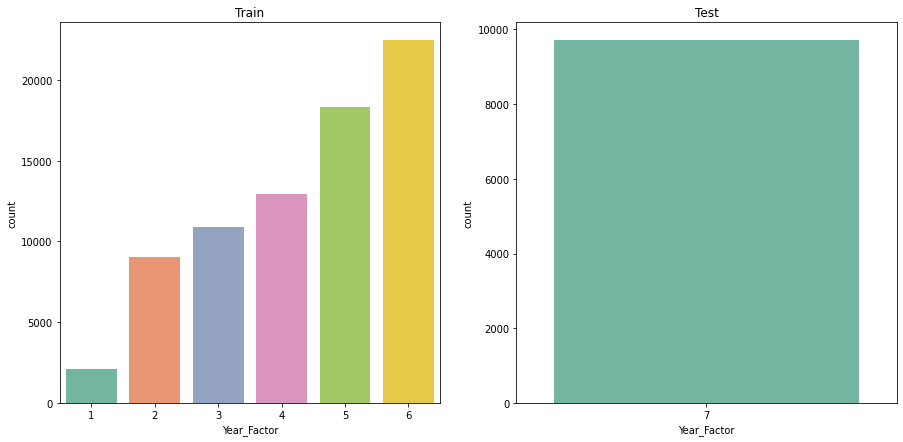

In [ ]:

fig, axes = plt.subplots(1, 2,  figsize=(15, 7))

#plot
sns.countplot(data=train, x = train['Year_Factor'], ax = axes[0], palette = 'Set2')
sns.countplot(data=train, x = test['Year_Factor'], ax = axes[1], palette = 'Set2')

#labels
axes[0].set(title = 'Train')
axes[1].set(title = 'Test')

plt.show()

#### Floor area

In [ ]:
#dqr train
numerical_train.loc[['floor_area']]

Data Type Records Unique Values  Missing Values  Missing %  \
floor_area   float64   75757         20433               0        0.0   

            Mean Value Minimum Value  1st Quartile   Median  3rd Quartile  \
floor_area    165983.9         943.0       62379.0  91367.0      166000.0   

           Maximum Value  
floor_area     6385382.0

In [ ]:
#dqr test
numerical_test.loc[['floor_area']]

Data Type Records Unique Values  Missing Values  Missing %  \
floor_area   float64    9705          8536               0        0.0   

            Mean Value Minimum Value  1st Quartile   Median  3rd Quartile  \
floor_area    163214.3        5982.0       48020.0  82486.0      177520.0   

           Maximum Value  
floor_area     6353396.0

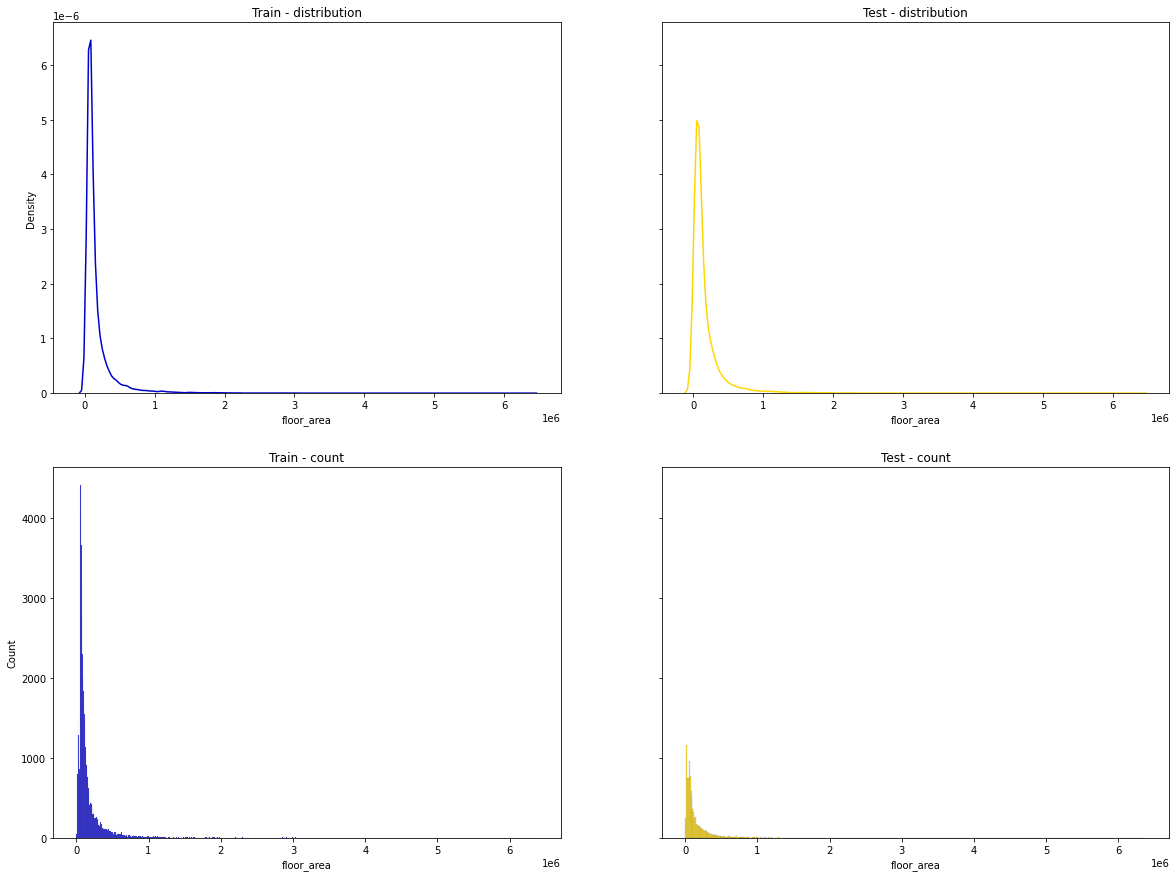

In [ ]:
graph_plotter('floor_area')

**skewness**

In [ ]:
#floor area is heavily skewed
train["floor_area"].skew()

6.60721031469132

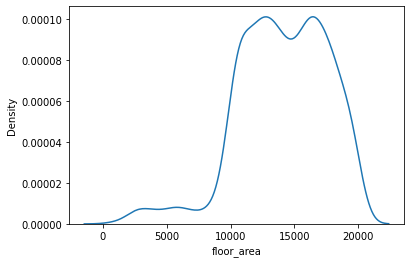

In [ ]:
#removing the biggest outliers still results in a skewed distribution
temp = train[train['floor_area']<20000.0]
sns.kdeplot(temp['floor_area'])

0.5228873859708586


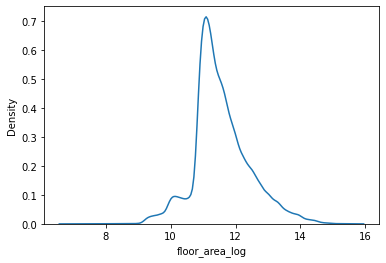

In [ ]:
temp = train.copy()
temp["floor_area_log"] = np.log(train["floor_area"])
sns.kdeplot(temp['floor_area_log'])

#log transformation fixes the skewness (-0.5 - 0.4 is fairly symetrical)
print(temp["floor_area_log"].skew())

#### Year Built

In [ ]:
#dqr train
numerical_train.loc[['year_built']]

Data Type Records Unique Values  Missing Values  Missing %  \
year_built   float64   73920           180            1837        2.4   

            Mean Value Minimum Value  1st Quartile  Median  3rd Quartile  \
year_built      1952.3           0.0        1927.0  1951.0        1977.0   

           Maximum Value  
year_built        2015.0

In [ ]:
#dqr test
numerical_test.loc[['year_built']]

Data Type Records Unique Values  Missing Values  Missing %  \
year_built   float64    9613           164              92        0.9   

            Mean Value Minimum Value  1st Quartile  Median  3rd Quartile  \
year_built      1963.2           0.0        1929.0  1969.0        1994.0   

           Maximum Value  
year_built        2016.0

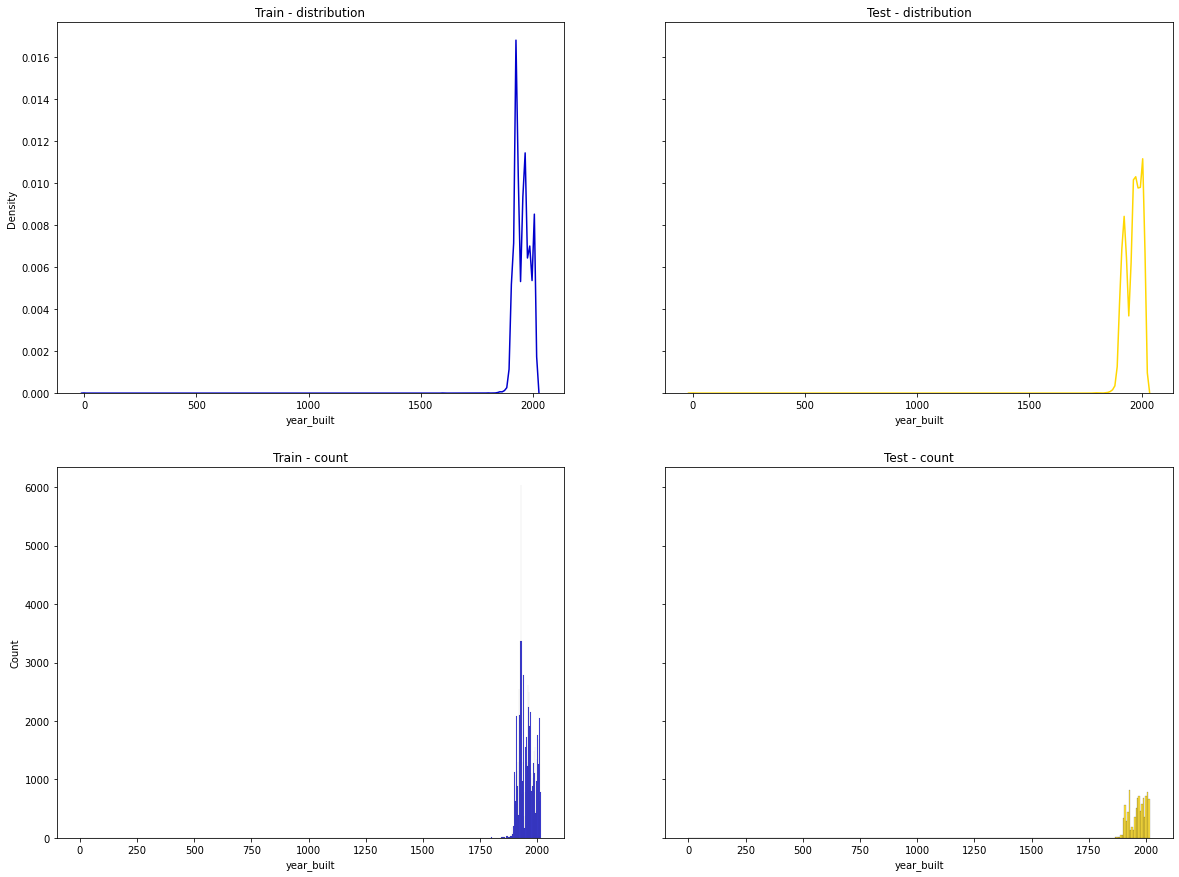

In [ ]:
graph_plotter('year_built')

**Missing data**

In [ ]:
train[train['year_built']==0]

Year_Factor State_Factor building_class  facility_type  floor_area  \
353             1      State_1     Commercial  Lodging_Hotel    204392.0   
955             2      State_1     Commercial  Lodging_Hotel    204392.0   
2159            3      State_1     Commercial  Lodging_Hotel    204392.0   
3415            4      State_1     Commercial  Lodging_Hotel    204392.0   
4535            5      State_1     Commercial  Lodging_Hotel    204392.0   
5571            6      State_1     Commercial  Lodging_Hotel    204392.0   

      year_built  energy_star_rating  ELEVATION  january_min_temp  \
353          0.0                61.0       59.1                36   
955          0.0                63.0        2.4                27   
2159         0.0                63.0        9.1                22   
3415         0.0                68.0        9.1                41   
4535         0.0                76.0        9.1                29   
5571         0.0                78.0       45.7                37   

      january_avg_temp  january_max_temp  february_min_temp  \
353          50.500000                68                 35   
955          48.951613                69                 33   
2159         44.790323                65                 25   
3415         55.096774                73                 42   
4535         51.387097                77                 36   
5571         52.693548                62                 42   

      february_avg_temp  february_max_temp  march_min_temp  march_avg_temp  \
353           50.589286                 73              40       53.693548   
955           51.655172                 78              34       52.822581   
2159          47.892857                 71              32       53.112903   
3415          54.875000                 71              47       59.032258   
4535          56.803571                 75              40       61.435484   
5571          56.948276                 75              47       57.725806   

      march_max_temp  april_min_temp  april_avg_temp  april_max_temp  \
353               80              41       55.500000              78   
955               74              37       58.850000              90   
2159              79              34       58.866667              87   
3415              76              47       60.100000              90   
4535              85              41       60.966667              91   
5571              76              47       60.283333              86   

      may_min_temp  may_avg_temp  may_max_temp  june_min_temp  june_avg_temp  \
353             46     56.854839            84             50      60.500000   
955             45     64.612903            92             49      67.900000   
2159            35     62.096774            91             44      66.283333   
3415            51     63.483871            92             52      64.250000   
4535            45     62.887097            90             55      72.983333   
5571            51     61.064516            87             51      63.350000   

      june_max_temp  july_min_temp  july_avg_temp  july_max_temp  \
353              90             52      62.725806             84   
955             103             53      70.467742             99   
2159             99             48      65.693548             91   
3415             87             53      66.903226             90   
4535            106             60      74.516129            103   
5571             87             53      62.919355             81   

      august_min_temp  august_avg_temp  august_max_temp  september_min_temp  \
353                52        62.161290               85                  52   
955                52        71.806452              100                  49   
2159               45        67.080645               92                  42   
3415               57        67.016129               80                  56   
4535               58        74.774194              104       

**Skewness**

-0.0021610411718588005


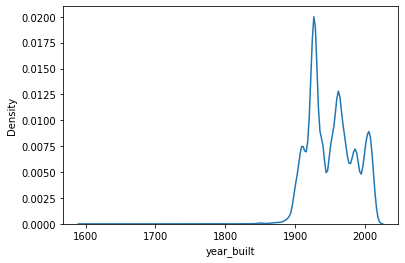

In [ ]:
#data is not considered skewed
temp = train[train['year_built']>0]
sns.kdeplot(temp['year_built'])
print(temp['year_built'].skew())

**Normality**

In [ ]:
from scipy.stats import shapiro
stat, p = shapiro(temp['year_built'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.957, p=0.000
Sample does not look Gaussian (reject H0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### Energy star rating

In [ ]:
#dqr train
numerical_train.loc[['energy_star_rating']]

Data Type Records Unique Values  Missing Values  Missing %  \
energy_star_rating   float64   49048           101           26709       35.3   

                    Mean Value Minimum Value  1st Quartile  Median  \
energy_star_rating        61.0           0.0          40.0    67.0   

                    3rd Quartile Maximum Value  
energy_star_rating          85.0         100.0

In [ ]:
#dqr test
numerical_test.loc[['energy_star_rating']]

Data Type Records Unique Values  Missing Values  Missing %  \
energy_star_rating   float64    7451           100            2254       23.2   

                    Mean Value Minimum Value  1st Quartile  Median  \
energy_star_rating        64.7           1.0          45.0    72.0   

                    3rd Quartile Maximum Value  
energy_star_rating          88.0         100.0

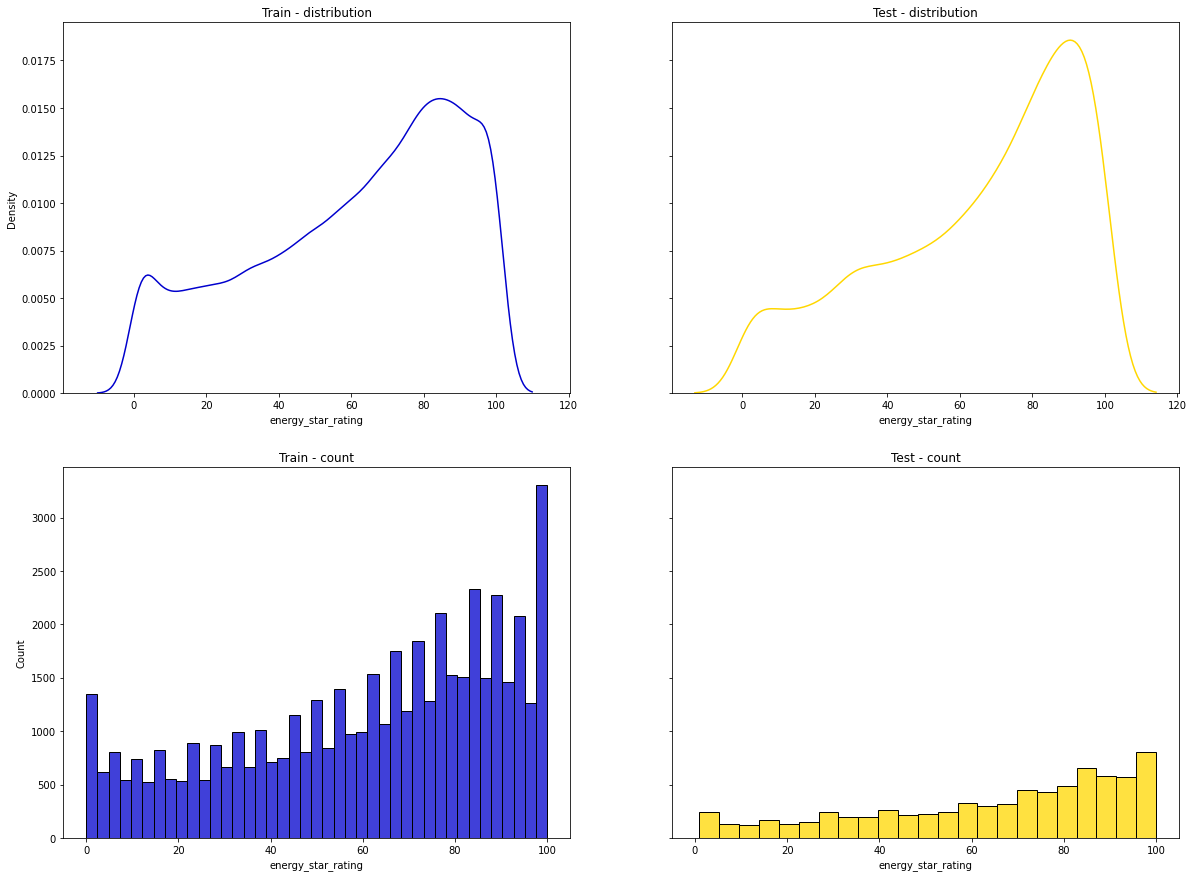

In [ ]:
graph_plotter('energy_star_rating')

**Skewness**

In [ ]:
print(train['energy_star_rating'].skew())

-0.5282802432729254


-2.354470135809683


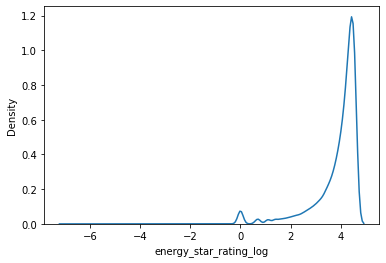

In [ ]:
temp = train.copy()
temp["energy_star_rating_log"] = np.log(train["energy_star_rating"]+0.001)
sns.kdeplot(temp['energy_star_rating_log'])

#log transformation does not help
print(temp["energy_star_rating_log"].skew())

#### Elevetion

In [ ]:
#dqr train
numerical_train.loc[['ELEVATION']]

Data Type Records Unique Values  Missing Values  Missing %  \
ELEVATION   float64   75757           193               0        0.0   

           Mean Value Minimum Value  1st Quartile  Median  3rd Quartile  \
ELEVATION        39.5          -6.4          11.9    25.0          42.7   

          Maximum Value  
ELEVATION        1924.5

In [ ]:
#dqr test
numerical_test.loc[['ELEVATION']]

Data Type Records Unique Values  Missing Values  Missing %  \
ELEVATION   float64    9705            44               0        0.0   

           Mean Value Minimum Value  1st Quartile  Median  3rd Quartile  \
ELEVATION       205.2           1.8          26.5   118.9         231.3   

          Maximum Value  
ELEVATION         812.0

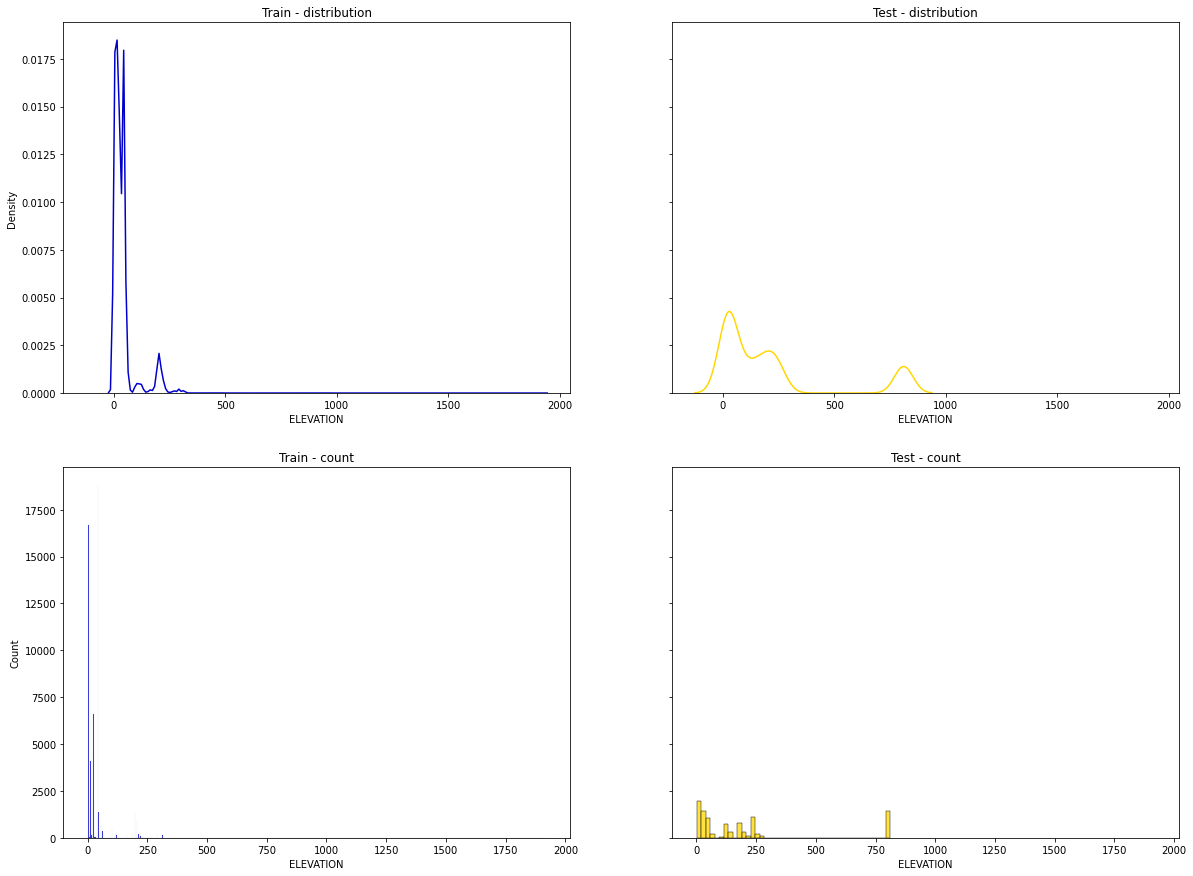

In [ ]:
graph_plotter('ELEVATION')

**Skewness**

In [ ]:
print(train['ELEVATION'].skew())

7.1028405787427715


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


-0.08084591278786567


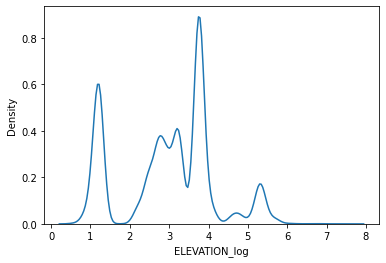

In [ ]:
temp = train.copy()
temp["ELEVATION_log"] = np.log(train["ELEVATION"]+0.001)
sns.kdeplot(temp['ELEVATION_log'])

#log transformation helps with skewness
print(temp["ELEVATION_log"].skew())

#### Minimum Temperature

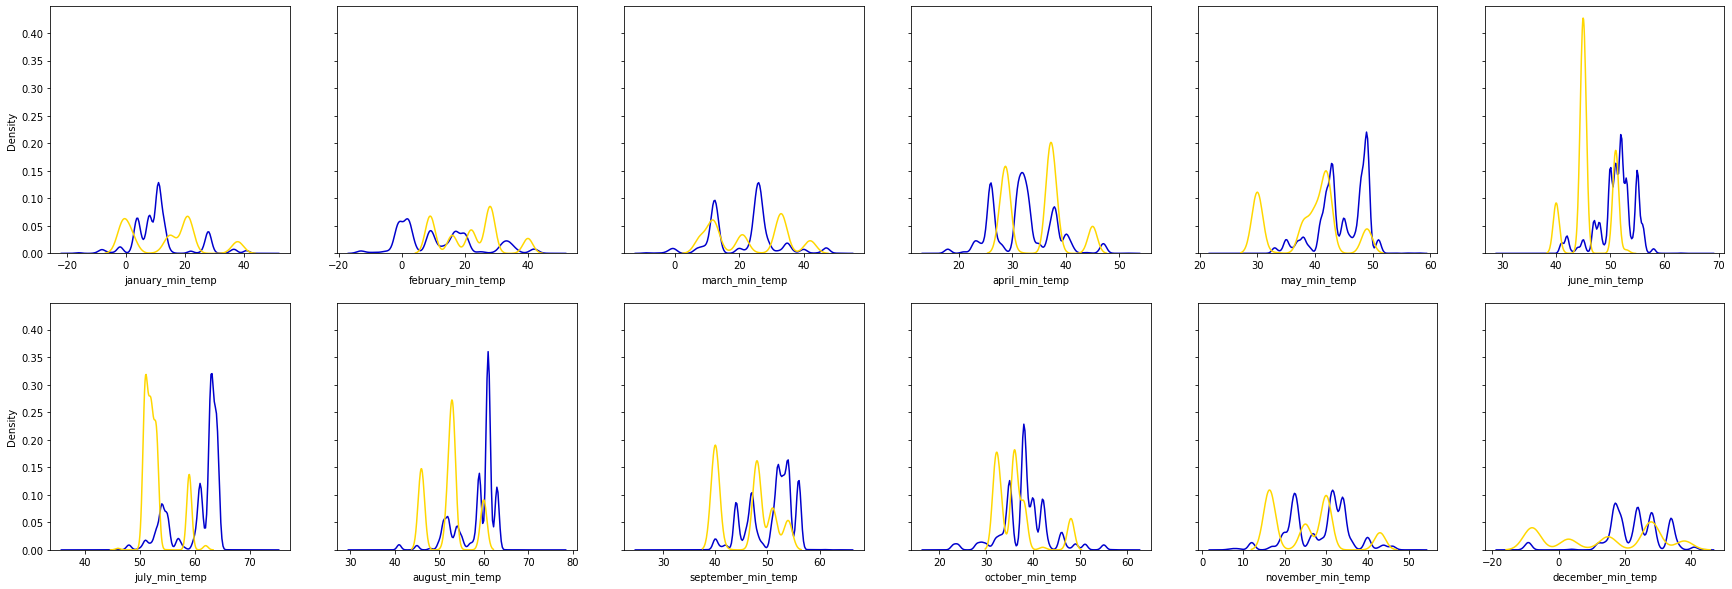

In [ ]:
fig, axes = plt.subplots(2, 6,  figsize=(30, 10), sharey = True)

#plot distribution
sns.kdeplot(train['january_min_temp'],  ax = axes[0,0], fill = False, color = 'mediumblue', )
sns.kdeplot(test['january_min_temp'],  ax = axes[0,0], fill = False, color = 'gold', )

sns.kdeplot(train['february_min_temp'],  ax = axes[0,1], fill = False, color = 'mediumblue', )
sns.kdeplot(test['february_min_temp'],  ax = axes[0,1], fill = False, color = 'gold', )

sns.kdeplot(train['march_min_temp'],  ax = axes[0,2], fill = False, color = 'mediumblue', )
sns.kdeplot(test['march_min_temp'],  ax = axes[0,2], fill = False, color = 'gold', )

sns.kdeplot(train['april_min_temp'],  ax = axes[0,3], fill = False, color = 'mediumblue', )
sns.kdeplot(test['april_min_temp'],  ax = axes[0,3], fill = False, color = 'gold', )

sns.kdeplot(train['may_min_temp'],  ax = axes[0,4], fill = False, color = 'mediumblue', )
sns.kdeplot(test['may_min_temp'],  ax = axes[0,4], fill = False, color = 'gold', )

sns.kdeplot(train['june_min_temp'],  ax = axes[0,5], fill = False, color = 'mediumblue', )
sns.kdeplot(test['june_min_temp'],  ax = axes[0,5], fill = False, color = 'gold', )

sns.kdeplot(train['july_min_temp'],  ax = axes[1,0], fill = False, color = 'mediumblue', )
sns.kdeplot(test['july_min_temp'],  ax = axes[1,0], fill = False, color = 'gold', )

sns.kdeplot(train['august_min_temp'],  ax = axes[1,1], fill = False, color = 'mediumblue', )
sns.kdeplot(test['august_min_temp'],  ax = axes[1,1], fill = False, color = 'gold', )

sns.kdeplot(train['september_min_temp'],  ax = axes[1,2], fill = False, color = 'mediumblue', )
sns.kdeplot(test['september_min_temp'],  ax = axes[1,2], fill = False, color = 'gold', )

sns.kdeplot(train['october_min_temp'],  ax = axes[1,3], fill = False, color = 'mediumblue', )
sns.kdeplot(test['october_min_temp'],  ax = axes[1,3], fill = False, color = 'gold', )

sns.kdeplot(train['november_min_temp'],  ax = axes[1,4], fill = False, color = 'mediumblue', )
sns.kdeplot(test['november_min_temp'],  ax = axes[1,4], fill = False, color = 'gold', )

sns.kdeplot(train['december_min_temp'],  ax = axes[1,5], fill = False, color = 'mediumblue', )
sns.kdeplot(test['december_min_temp'],  ax = axes[1,5], fill = False, color = 'gold', )

plt.show()

**Skewness**

In [ ]:
print(train['february_min_temp'].skew())

0.6226502204323057


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


-0.6016055809063217


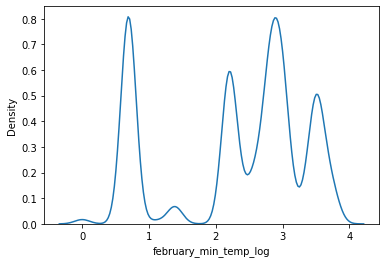

In [ ]:
temp = train.copy()
temp["february_min_temp_log"] = np.log(train["february_min_temp"]+0.001)
sns.kdeplot(temp['february_min_temp_log'])

#log transformation does not help
print(temp["february_min_temp_log"].skew())

####  Average Temperature

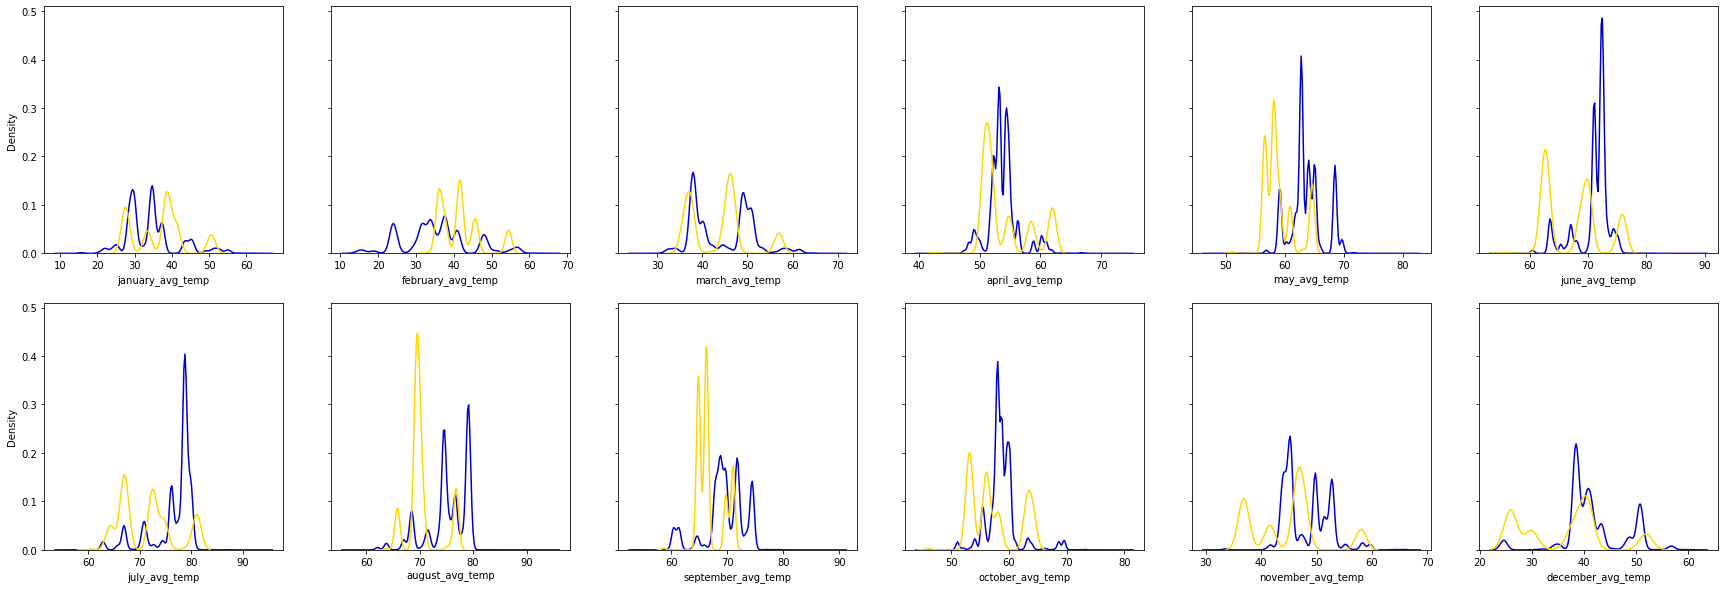

In [ ]:
fig, axes = plt.subplots(2, 6,  figsize=(30, 10), sharey = True)

#plot distribution
sns.kdeplot(train['january_avg_temp'],  ax = axes[0,0], fill = False, color = 'mediumblue', )
sns.kdeplot(test['january_avg_temp'],  ax = axes[0,0], fill = False, color = 'gold', )

sns.kdeplot(train['february_avg_temp'],  ax = axes[0,1], fill = False, color = 'mediumblue', )
sns.kdeplot(test['february_avg_temp'],  ax = axes[0,1], fill = False, color = 'gold', )

sns.kdeplot(train['march_avg_temp'],  ax = axes[0,2], fill = False, color = 'mediumblue', )
sns.kdeplot(test['march_avg_temp'],  ax = axes[0,2], fill = False, color = 'gold', )

sns.kdeplot(train['april_avg_temp'],  ax = axes[0,3], fill = False, color = 'mediumblue', )
sns.kdeplot(test['april_avg_temp'],  ax = axes[0,3], fill = False, color = 'gold', )

sns.kdeplot(train['may_avg_temp'],  ax = axes[0,4], fill = False, color = 'mediumblue', )
sns.kdeplot(test['may_avg_temp'],  ax = axes[0,4], fill = False, color = 'gold', )

sns.kdeplot(train['june_avg_temp'],  ax = axes[0,5], fill = False, color = 'mediumblue', )
sns.kdeplot(test['june_avg_temp'],  ax = axes[0,5], fill = False, color = 'gold', )

sns.kdeplot(train['july_avg_temp'],  ax = axes[1,0], fill = False, color = 'mediumblue', )
sns.kdeplot(test['july_avg_temp'],  ax = axes[1,0], fill = False, color = 'gold', )

sns.kdeplot(train['august_avg_temp'],  ax = axes[1,1], fill = False, color = 'mediumblue', )
sns.kdeplot(test['august_avg_temp'],  ax = axes[1,1], fill = False, color = 'gold', )

sns.kdeplot(train['september_avg_temp'],  ax = axes[1,2], fill = False, color = 'mediumblue', )
sns.kdeplot(test['september_avg_temp'],  ax = axes[1,2], fill = False, color = 'gold', )

sns.kdeplot(train['october_avg_temp'],  ax = axes[1,3], fill = False, color = 'mediumblue', )
sns.kdeplot(test['october_avg_temp'],  ax = axes[1,3], fill = False, color = 'gold', )

sns.kdeplot(train['november_avg_temp'],  ax = axes[1,4], fill = False, color = 'mediumblue', )
sns.kdeplot(test['november_avg_temp'],  ax = axes[1,4], fill = False, color = 'gold', )

sns.kdeplot(train['december_avg_temp'],  ax = axes[1,5], fill = False, color = 'mediumblue', )
sns.kdeplot(test['december_avg_temp'],  ax = axes[1,5], fill = False, color = 'gold', )

plt.show()

#### Max temperature

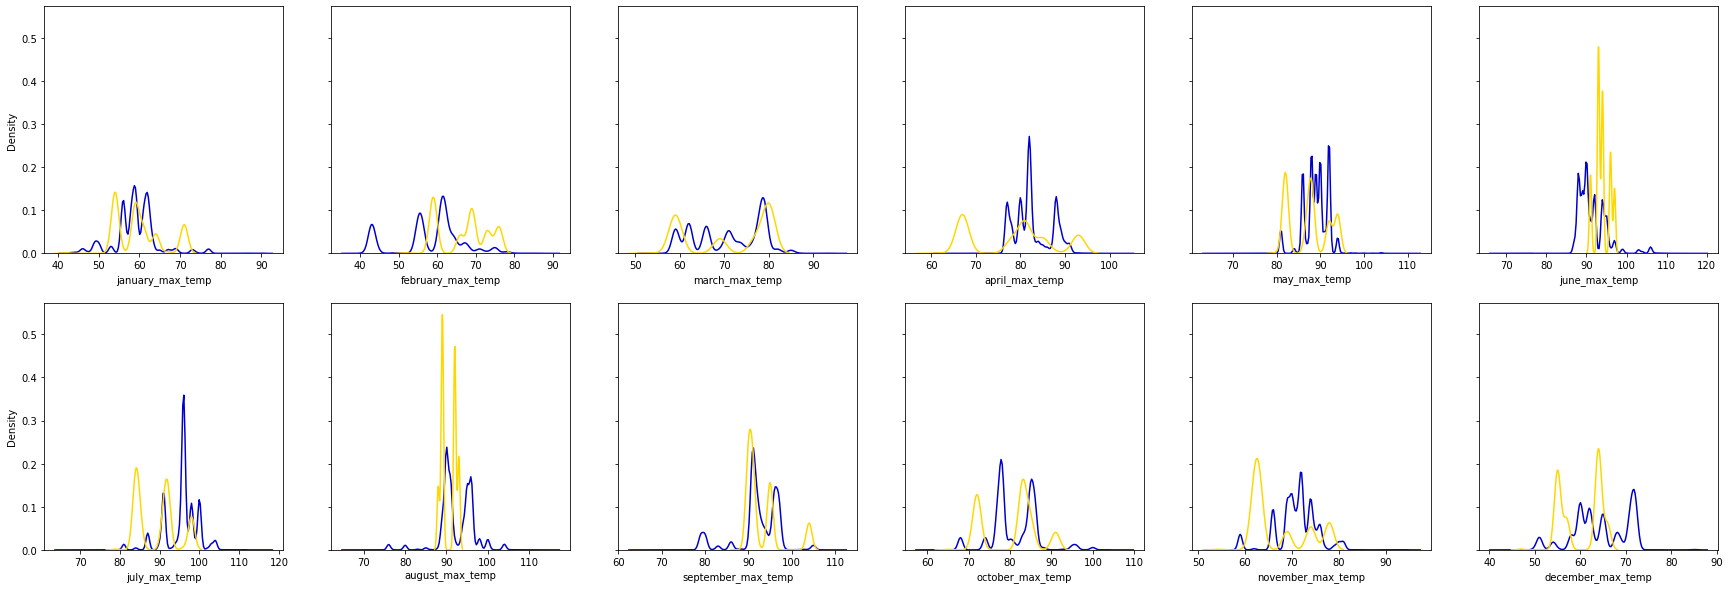

In [ ]:
fig, axes = plt.subplots(2, 6,  figsize=(30, 10), sharey = True)

#plot distribution
sns.kdeplot(train['january_max_temp'],  ax = axes[0,0], fill = False, color = 'mediumblue', )
sns.kdeplot(test['january_max_temp'],  ax = axes[0,0], fill = False, color = 'gold', )

sns.kdeplot(train['february_max_temp'],  ax = axes[0,1], fill = False, color = 'mediumblue', )
sns.kdeplot(test['february_max_temp'],  ax = axes[0,1], fill = False, color = 'gold', )

sns.kdeplot(train['march_max_temp'],  ax = axes[0,2], fill = False, color = 'mediumblue', )
sns.kdeplot(test['march_max_temp'],  ax = axes[0,2], fill = False, color = 'gold', )

sns.kdeplot(train['april_max_temp'],  ax = axes[0,3], fill = False, color = 'mediumblue', )
sns.kdeplot(test['april_max_temp'],  ax = axes[0,3], fill = False, color = 'gold', )

sns.kdeplot(train['may_max_temp'],  ax = axes[0,4], fill = False, color = 'mediumblue', )
sns.kdeplot(test['may_max_temp'],  ax = axes[0,4], fill = False, color = 'gold', )

sns.kdeplot(train['june_max_temp'],  ax = axes[0,5], fill = False, color = 'mediumblue', )
sns.kdeplot(test['june_max_temp'],  ax = axes[0,5], fill = False, color = 'gold', )

sns.kdeplot(train['july_max_temp'],  ax = axes[1,0], fill = False, color = 'mediumblue', )
sns.kdeplot(test['july_max_temp'],  ax = axes[1,0], fill = False, color = 'gold', )

sns.kdeplot(train['august_max_temp'],  ax = axes[1,1], fill = False, color = 'mediumblue', )
sns.kdeplot(test['august_max_temp'],  ax = axes[1,1], fill = False, color = 'gold', )

sns.kdeplot(train['september_max_temp'],  ax = axes[1,2], fill = False, color = 'mediumblue', )
sns.kdeplot(test['september_max_temp'],  ax = axes[1,2], fill = False, color = 'gold', )

sns.kdeplot(train['october_max_temp'],  ax = axes[1,3], fill = False, color = 'mediumblue', )
sns.kdeplot(test['october_max_temp'],  ax = axes[1,3], fill = False, color = 'gold', )

sns.kdeplot(train['november_max_temp'],  ax = axes[1,4], fill = False, color = 'mediumblue', )
sns.kdeplot(test['november_max_temp'],  ax = axes[1,4], fill = False, color = 'gold', )

sns.kdeplot(train['december_max_temp'],  ax = axes[1,5], fill = False, color = 'mediumblue', )
sns.kdeplot(test['december_max_temp'],  ax = axes[1,5], fill = False, color = 'gold', )

plt.show()

####Cooling degree days

In [ ]:
#dqr train
numerical_train.loc[['cooling_degree_days']]

Data Type Records Unique Values  Missing Values  \
cooling_degree_days     int64   75757           162               0   

                     Missing %  Mean Value Minimum Value  1st Quartile  \
cooling_degree_days        0.0      1202.3             0        1128.0   

                     Median  3rd Quartile Maximum Value  
cooling_degree_days  1277.0        1489.0          4948

In [ ]:
#dqr test
numerical_test.loc[['cooling_degree_days']]

Data Type Records Unique Values  Missing Values  \
cooling_degree_days     int64    9705             8               0   

                     Missing %  Mean Value Minimum Value  1st Quartile  \
cooling_degree_days        0.0       733.4           110         345.0   

                     Median  3rd Quartile Maximum Value  
cooling_degree_days   761.0         866.0          1643

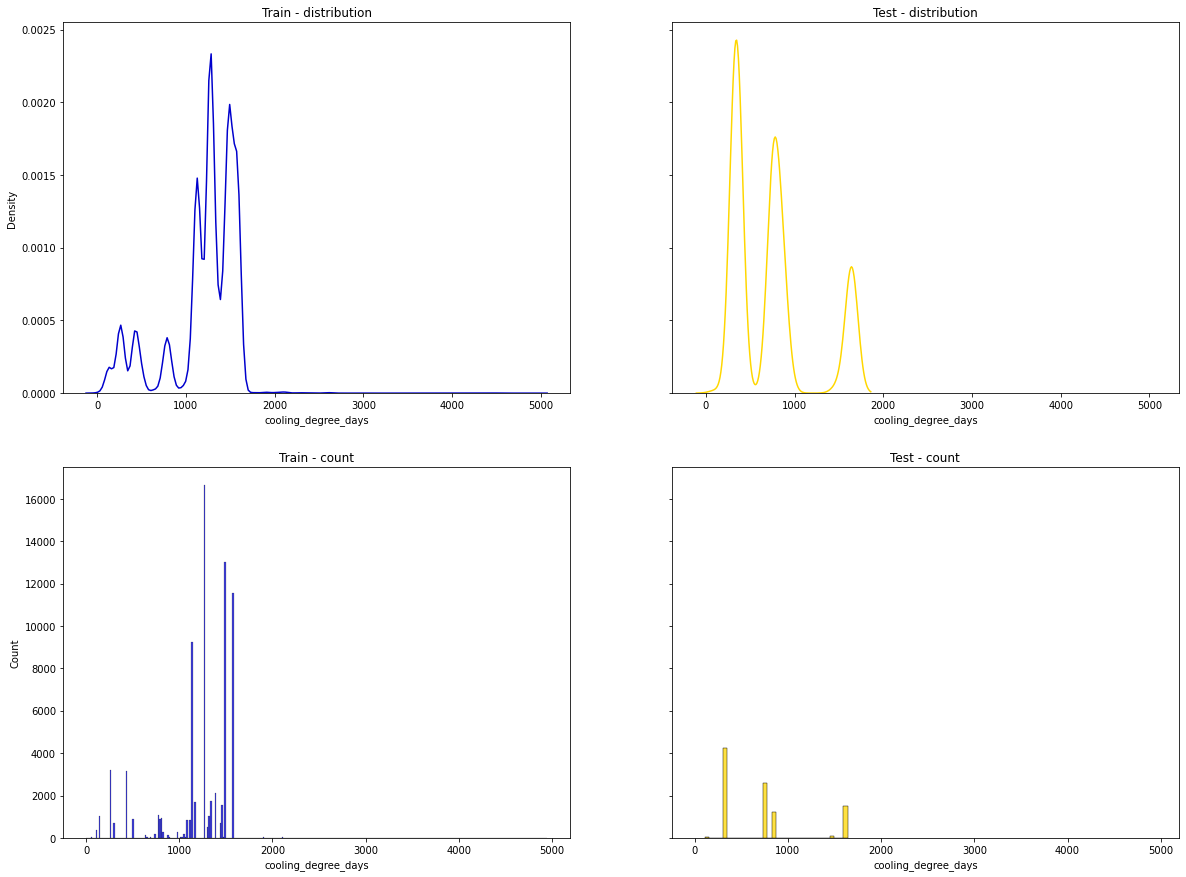

In [ ]:
graph_plotter('cooling_degree_days')

 **Skeweness**

In [ ]:
print(train['cooling_degree_days'].skew())

-1.2052087296943437


-2.5500054675684245


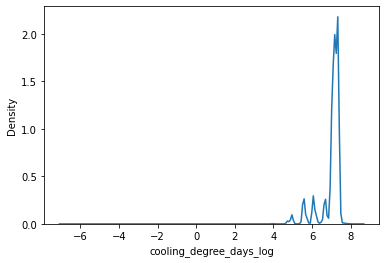

In [ ]:
temp = train.copy()
temp["cooling_degree_days_log"] = np.log(train["cooling_degree_days"]+0.001)
sns.kdeplot(temp['cooling_degree_days_log'])

#log transformation
print(temp["cooling_degree_days_log"].skew())

#### Heating days

In [ ]:
#dqr train
numerical_train.loc[['heating_degree_days']]

Data Type Records Unique Values  Missing Values  \
heating_degree_days     int64   75757           170               0   

                     Missing %  Mean Value Minimum Value  1st Quartile  \
heating_degree_days        0.0      4325.0           398        3978.0   

                     Median  3rd Quartile Maximum Value  
heating_degree_days  4337.0        4670.0          7929

In [ ]:
#dqr test
numerical_test.loc[['heating_degree_days']]

Data Type Records Unique Values  Missing Values  \
heating_degree_days     int64    9705             8               0   

                     Missing %  Mean Value Minimum Value  1st Quartile  \
heating_degree_days        0.0      4565.2          2112        3555.0   

                     Median  3rd Quartile Maximum Value  
heating_degree_days  4478.0        5907.0          6877

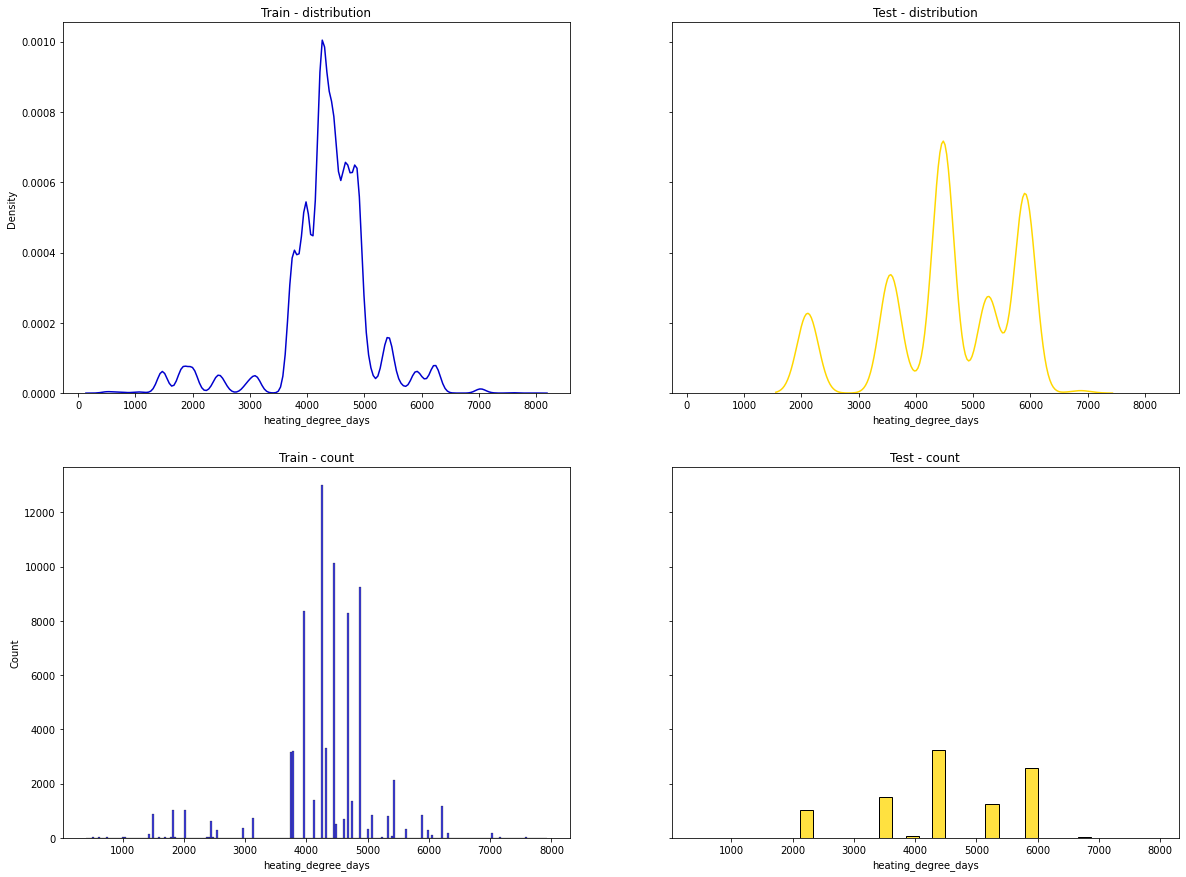

In [ ]:
graph_plotter('heating_degree_days')

**Skewness**

-1.1267276045004913
-2.909364566059468


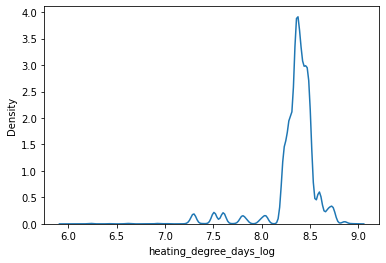

In [ ]:
print(train['heating_degree_days'].skew())

temp = train.copy()
temp["heating_degree_days_log"] = np.log(train["heating_degree_days"]+0.001)
sns.kdeplot(temp['heating_degree_days_log'])

#log transformation
print(temp["heating_degree_days_log"].skew())

#### Precipitation

In [ ]:
#dqr train
numerical_train.loc[['precipitation_inches']]

Data Type Records Unique Values  Missing Values  \
precipitation_inches   float64   75757           171               0   

                      Missing %  Mean Value Minimum Value  1st Quartile  \
precipitation_inches        0.0        42.4           0.0          39.4   

                      Median  3rd Quartile Maximum Value  
precipitation_inches    42.2          46.3        107.69

In [ ]:
#dqr test
numerical_test.loc[['precipitation_inches']]

Data Type Records Unique Values  Missing Values  \
precipitation_inches   float64    9705             8               0   

                      Missing %  Mean Value Minimum Value  1st Quartile  \
precipitation_inches        0.0        41.6         25.24          41.1   

                      Median  3rd Quartile Maximum Value  
precipitation_inches    42.6          44.8        112.92

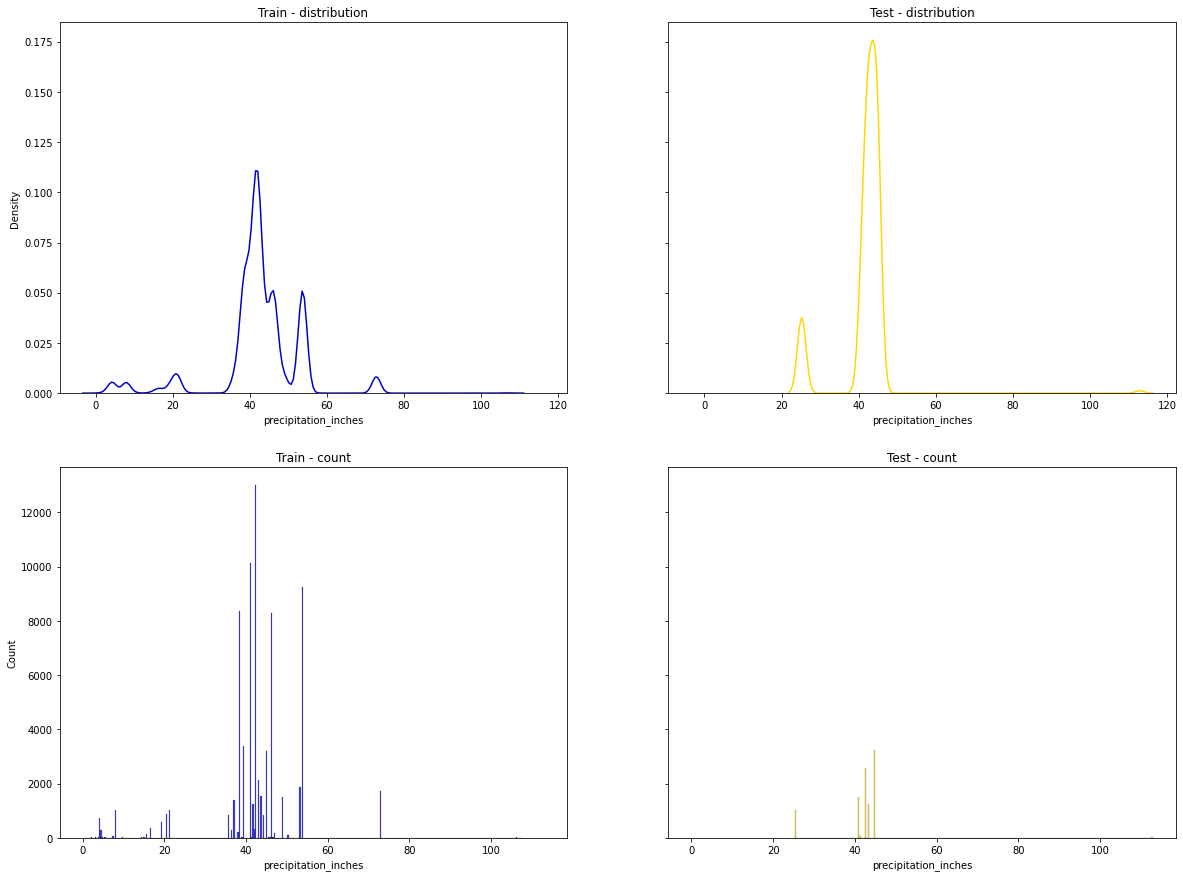

In [ ]:
graph_plotter('precipitation_inches')

**Skewness**

-0.9055198585449423
-4.029328793750283


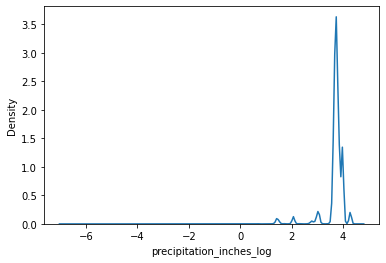

In [ ]:
print(train['precipitation_inches'].skew())

temp = train.copy()
temp["precipitation_inches_log"] = np.log(train["precipitation_inches"]+0.001)
sns.kdeplot(temp['precipitation_inches_log'])

#log transformation
print(temp["precipitation_inches_log"].skew())

#### Snowfall

In [ ]:
#dqr train
numerical_train.loc[['snowdepth_inches']]

Data Type Records Unique Values  Missing Values  Missing %  \
snowdepth_inches     int64   75757            60               0        0.0   

                  Mean Value Minimum Value  1st Quartile  Median  \
snowdepth_inches       164.9             0          10.0   101.0   

                  3rd Quartile Maximum Value  
snowdepth_inches         377.0          1292

In [ ]:
#dqr test
numerical_test.loc[['snowdepth_inches']]

Data Type Records Unique Values  Missing Values  Missing %  \
snowdepth_inches     int64    9705             8               0        0.0   

                  Mean Value Minimum Value  1st Quartile  Median  \
snowdepth_inches        17.3             0           6.0    10.0   

                  3rd Quartile Maximum Value  
snowdepth_inches          17.0           530

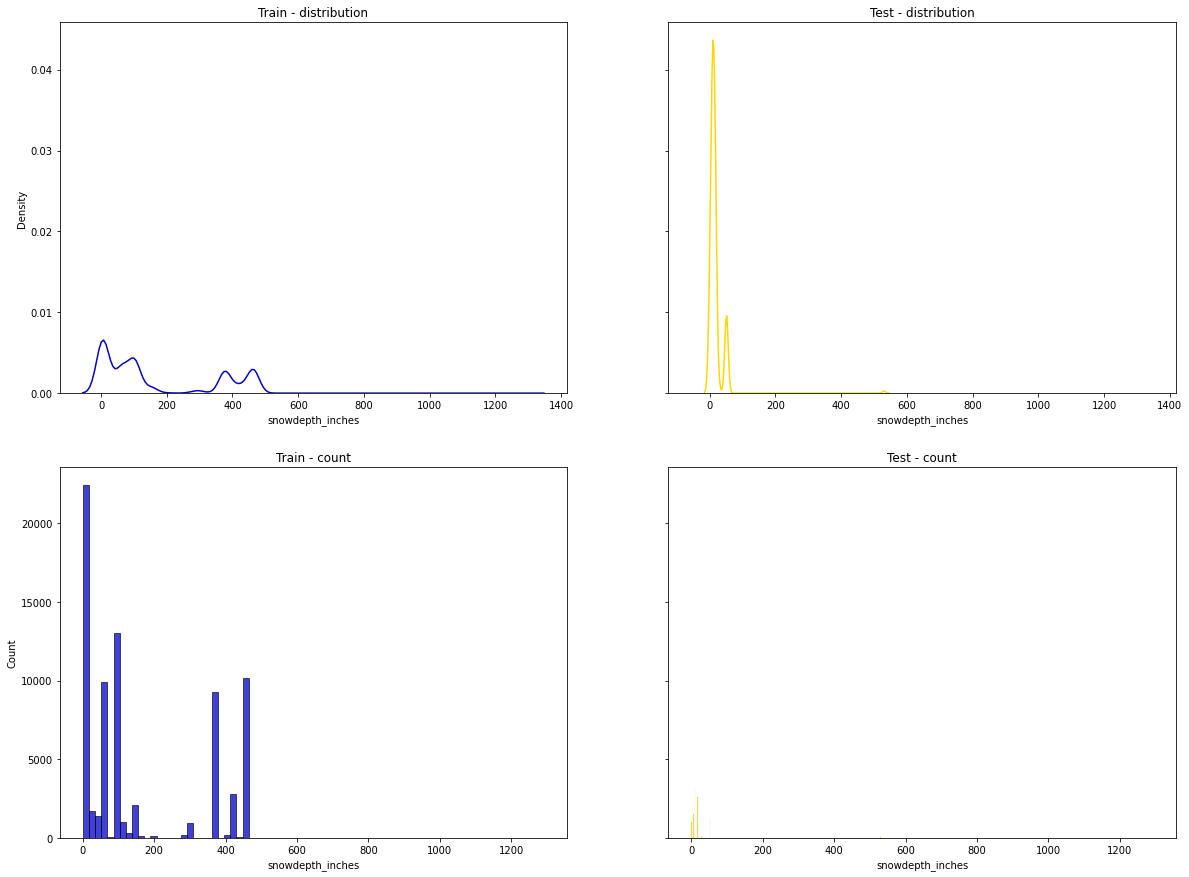

In [ ]:
graph_plotter('snowdepth_inches')

**Skewness**

0.7330869448624191
-1.7925189985591625


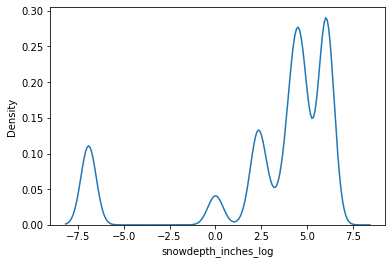

In [ ]:
print(train['snowdepth_inches'].skew())

temp = train.copy()
temp["snowdepth_inches_log"] = np.log(train["snowdepth_inches"]+0.001)
sns.kdeplot(temp['snowdepth_inches_log'])

#log transformation
print(temp["snowdepth_inches_log"].skew())

#### Average temperature

In [ ]:
#dqr train
numerical_train.loc[['avg_temp']]

Data Type Records Unique Values  Missing Values  Missing %  \
avg_temp   float64   75757           173               0        0.0   

          Mean Value Minimum Value  1st Quartile  Median  3rd Quartile  \
avg_temp        56.2     44.512329          55.1    56.8          57.2   

         Maximum Value  
avg_temp     77.245205

In [ ]:
#dqr train
numerical_test.loc[['avg_temp']]

Data Type Records Unique Values  Missing Values  Missing %  \
avg_temp   float64    9705             8               0        0.0   

          Mean Value Minimum Value  1st Quartile  Median  3rd Quartile  \
avg_temp        54.2     46.073204          50.6    53.4          59.4   

         Maximum Value  
avg_temp     59.894521

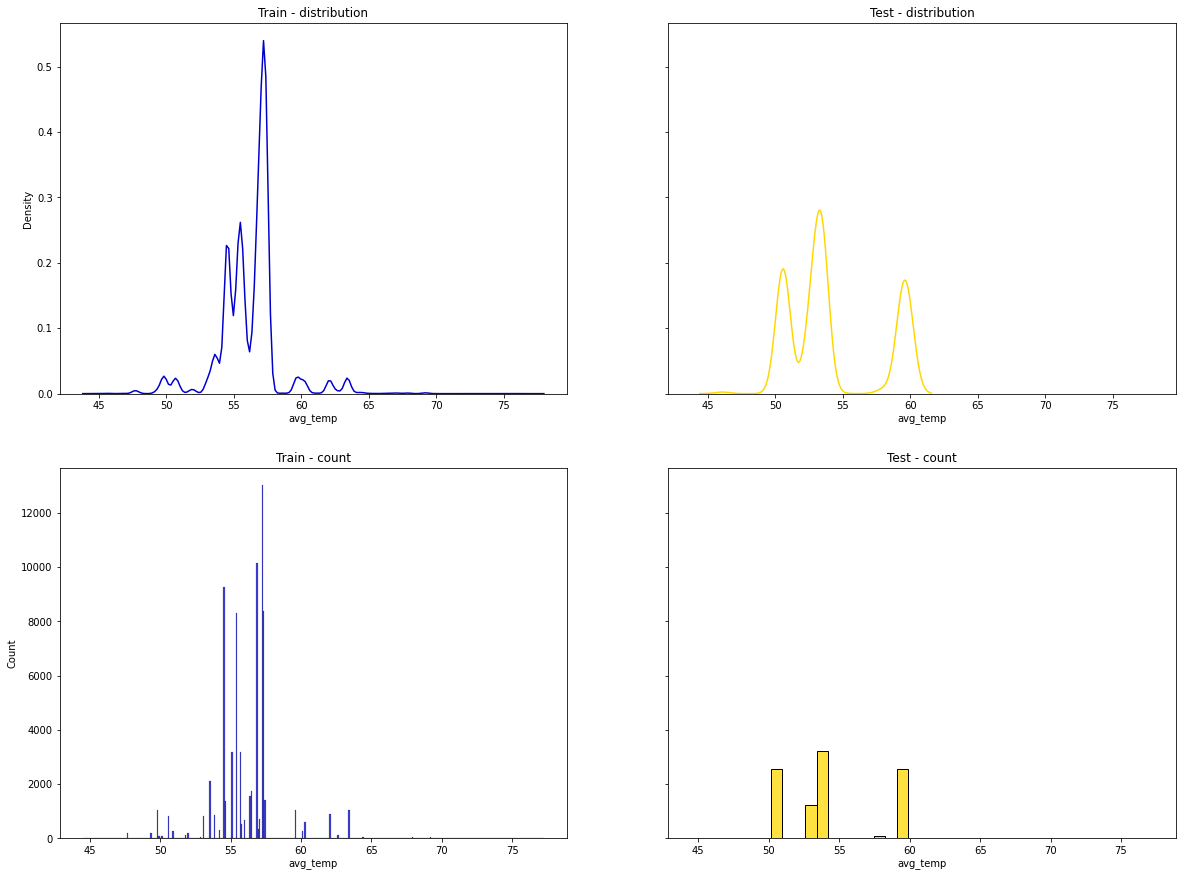

In [ ]:
graph_plotter('avg_temp')

**Skewness**

0.3408026682644119
-0.06235328071580815


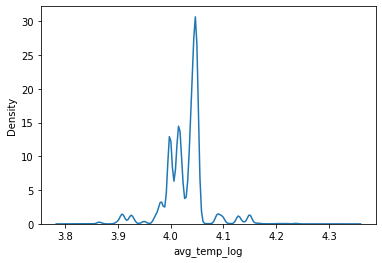

In [ ]:
print(train['avg_temp'].skew())

temp = train.copy()
temp["avg_temp_log"] = np.log(train["avg_temp"]+0.001)
sns.kdeplot(temp['avg_temp_log'])

#log transformation
print(temp["avg_temp_log"].skew())

#### Days below 30

In [ ]:
#dqr train
numerical_train.loc[['days_below_30F']]

Data Type Records Unique Values  Missing Values  Missing %  \
days_below_30F     int64   75757            82               0        0.0   

                Mean Value Minimum Value  1st Quartile  Median  3rd Quartile  \
days_below_30F        48.8             0          22.0    50.0          66.0   

               Maximum Value  
days_below_30F           170

In [ ]:
#dqr train
numerical_test.loc[['days_below_30F']]

Data Type Records Unique Values  Missing Values  Missing %  \
days_below_30F     int64    9705             8               0        0.0   

                Mean Value Minimum Value  1st Quartile  Median  3rd Quartile  \
days_below_30F        54.3             0          17.0    45.0         108.0   

               Maximum Value  
days_below_30F           108

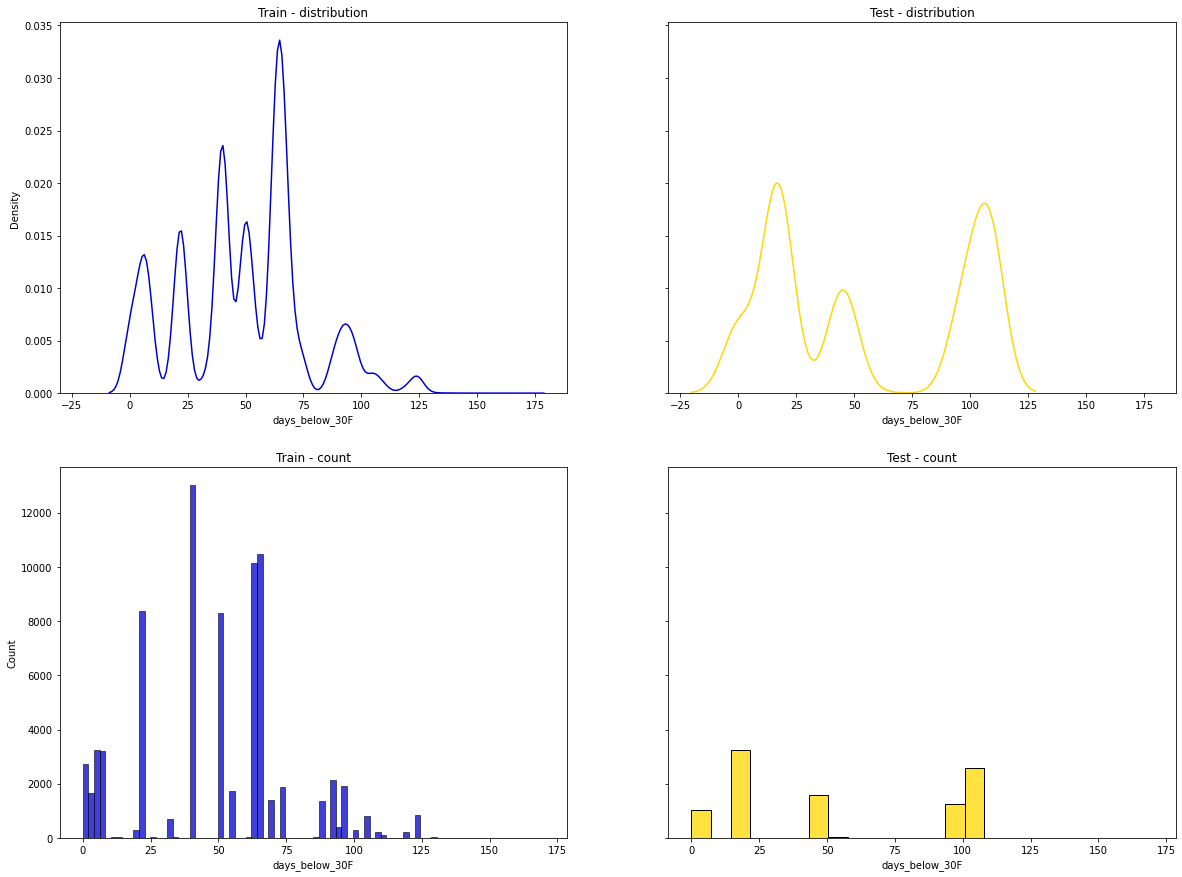

In [ ]:
graph_plotter('days_below_30F')

**Skewness**

0.14026123644893218
-4.02925757275795


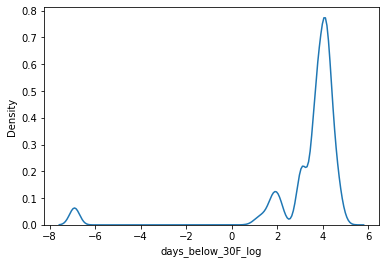

In [ ]:
print(train['days_below_30F'].skew())

temp = train.copy()
temp["days_below_30F_log"] = np.log(train["days_below_30F"]+0.001)
sns.kdeplot(temp['days_below_30F_log'])

#log transformation
print(temp["days_below_30F_log"].skew())

#### Days below 20

In [ ]:
#dqr train
numerical_train.loc[['days_below_20F']]

Data Type Records Unique Values  Missing Values  Missing %  \
days_below_20F     int64   75757            38               0        0.0   

                Mean Value Minimum Value  1st Quartile  Median  3rd Quartile  \
days_below_20F        17.4             0           5.0    11.0          26.0   

               Maximum Value  
days_below_20F            93

In [ ]:
#dqr test
numerical_test.loc[['days_below_20F']]

Data Type Records Unique Values  Missing Values  Missing %  \
days_below_20F     int64    9705             6               0        0.0   

                Mean Value Minimum Value  1st Quartile  Median  3rd Quartile  \
days_below_20F        20.4             0           0.0     7.0          51.0   

               Maximum Value  
days_below_20F            51

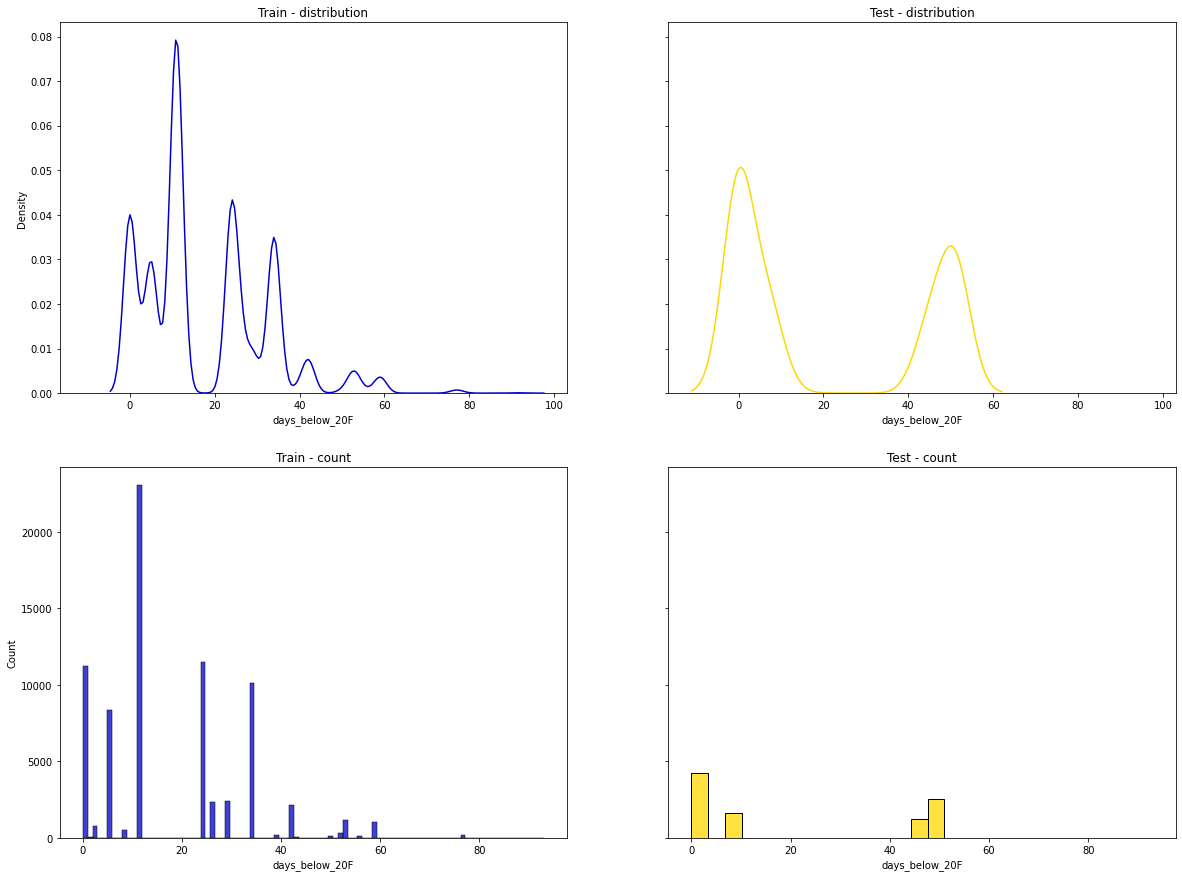

In [ ]:
graph_plotter('days_below_20F')

**Skewness**

0.9013890718476776
-1.8292603170657196


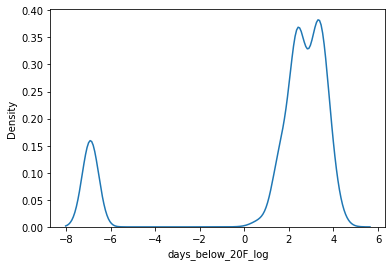

In [ ]:
print(train['days_below_20F'].skew())

temp = train.copy()
temp["days_below_20F_log"] = np.log(train["days_below_20F"]+0.001)
sns.kdeplot(temp['days_below_20F_log'])

#log transformation
print(temp["days_below_20F_log"].skew())

#### Days below 10

In [ ]:
#dqr train
numerical_train.loc[['days_below_10F']]

Data Type Records Unique Values  Missing Values  Missing %  \
days_below_10F     int64   75757            30               0        0.0   

                Mean Value Minimum Value  1st Quartile  Median  3rd Quartile  \
days_below_10F         4.9             0           0.0     2.0           7.0   

               Maximum Value  
days_below_10F            59

In [ ]:
#dqr test
numerical_test.loc[['days_below_10F']]

Data Type Records Unique Values  Missing Values  Missing %  \
days_below_10F     int64    9705             4               0        0.0   

                Mean Value Minimum Value  1st Quartile  Median  3rd Quartile  \
days_below_10F         5.4             0           0.0     0.0          14.0   

               Maximum Value  
days_below_10F            14

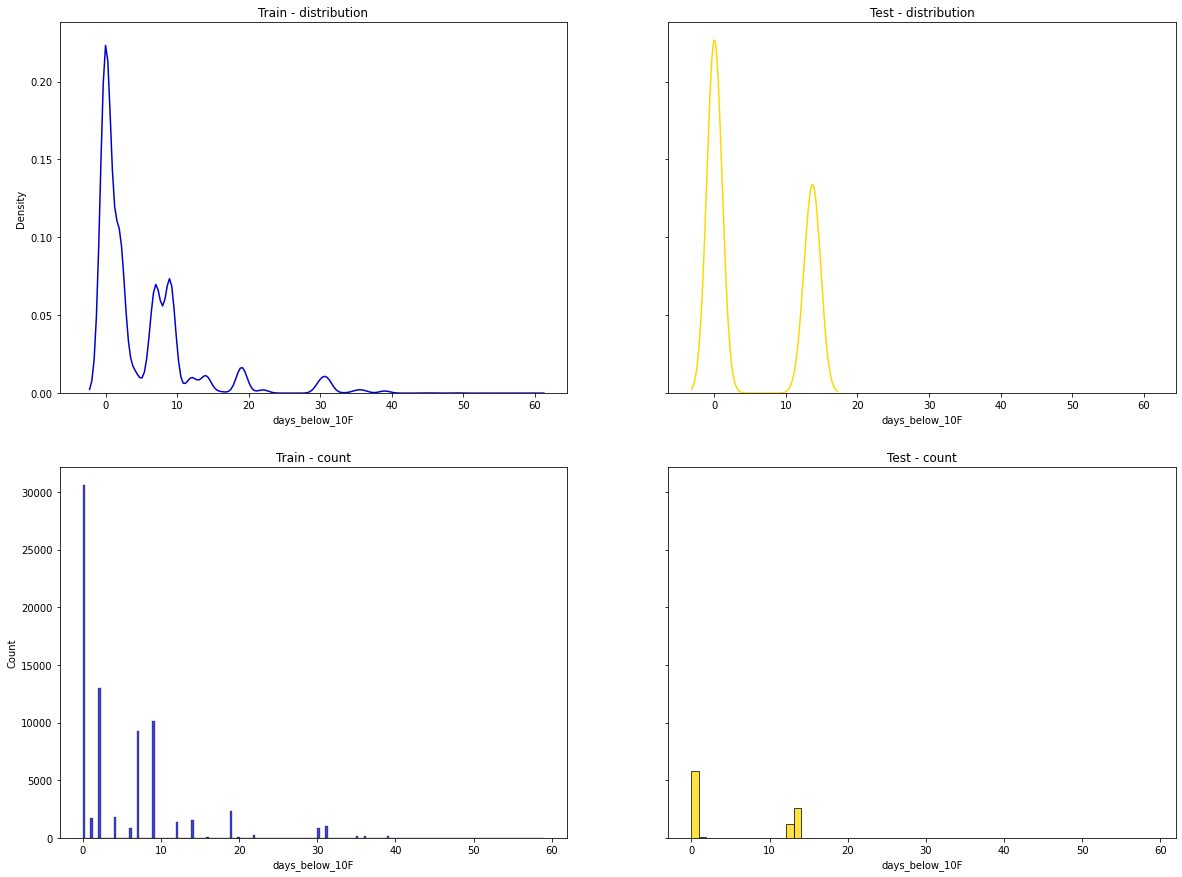

In [ ]:
graph_plotter('days_below_10F')

**Skewness**

2.3037835381050344
-0.31257061817478293


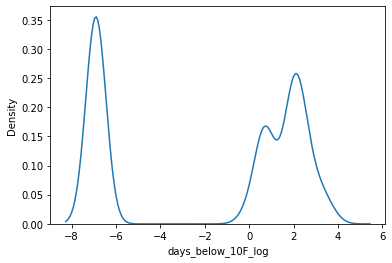

In [ ]:
print(train['days_below_10F'].skew())

temp = train.copy()
temp["days_below_10F_log"] = np.log(train["days_below_10F"]+0.001)
sns.kdeplot(temp['days_below_10F_log'])

#log transformation
print(temp["days_below_10F_log"].skew())

#### Days below 0

In [ ]:
#dqr train
numerical_train.loc[['days_below_0F']]

Data Type Records Unique Values  Missing Values  Missing %  \
days_below_0F     int64   75757            19               0        0.0   

               Mean Value Minimum Value  1st Quartile  Median  3rd Quartile  \
days_below_0F         0.9             0           0.0     0.0           0.0   

              Maximum Value  
days_below_0F            31

In [ ]:
#dqr test
numerical_test.loc[['days_below_0F']]

Data Type Records Unique Values  Missing Values  Missing %  \
days_below_0F     int64    9705             2               0        0.0   

               Mean Value Minimum Value  1st Quartile  Median  3rd Quartile  \
days_below_0F         1.3             0           0.0     0.0           5.0   

              Maximum Value  
days_below_0F             5

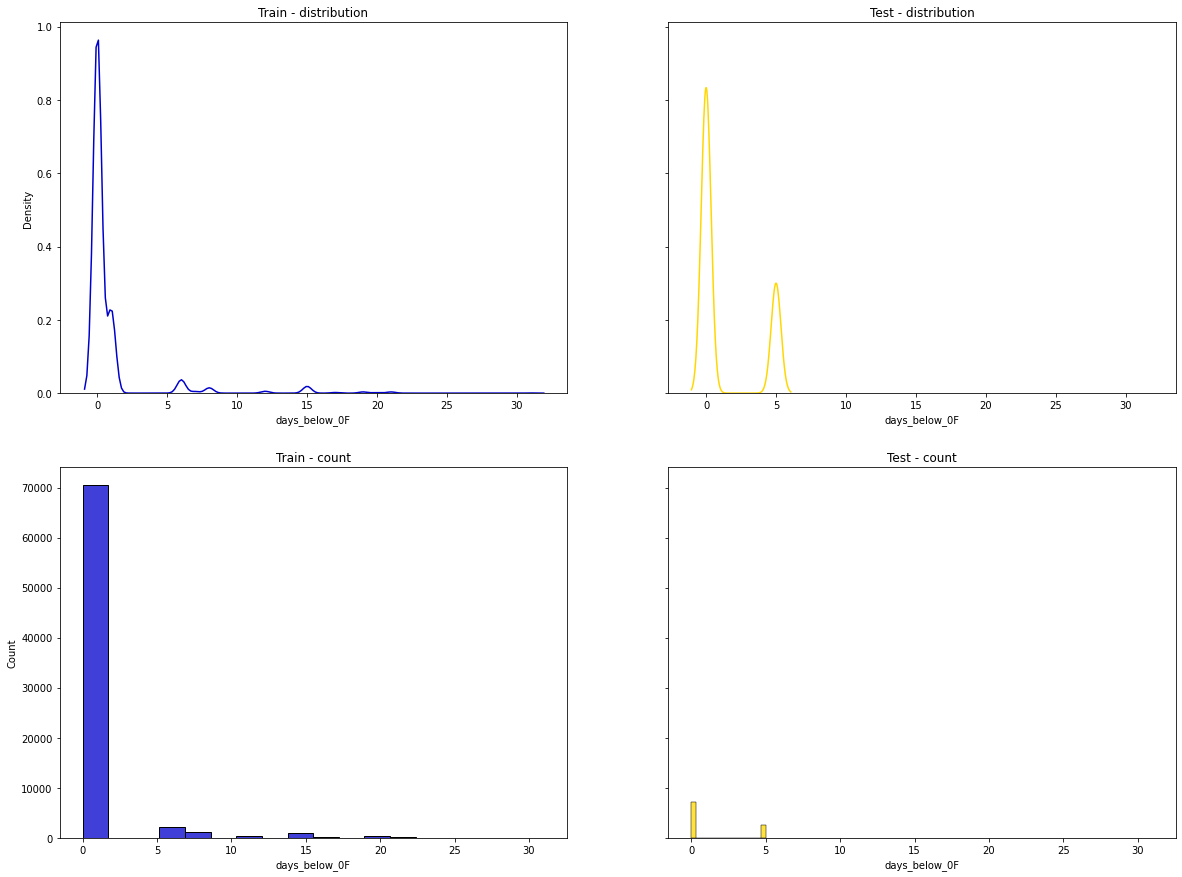

In [ ]:
graph_plotter('days_below_0F')

**Skewness**

4.740917885970354
1.294340351054719


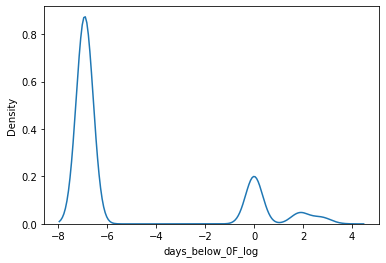

In [ ]:
print(train['days_below_0F'].skew())

temp = train.copy()
temp["days_below_0F_log"] = np.log(train["days_below_0F"]+0.001)
sns.kdeplot(temp['days_below_0F_log'])

#log transformation
print(temp["days_below_0F_log"].skew())

##### Days above 80

In [ ]:
#dqr train
numerical_train.loc[['days_above_80F']]

Data Type Records Unique Values  Missing Values  Missing %  \
days_above_80F     int64   75757           110               0        0.0   

                Mean Value Minimum Value  1st Quartile  Median  3rd Quartile  \
days_above_80F        82.7             0          72.0    84.0          97.0   

               Maximum Value  
days_above_80F           260

In [ ]:
#dqr test
numerical_test.loc[['days_above_80F']]

Data Type Records Unique Values  Missing Values  Missing %  \
days_above_80F     int64    9705             8               0        0.0   

                Mean Value Minimum Value  1st Quartile  Median  3rd Quartile  \
days_above_80F        66.8            15          39.0    77.0          79.0   

               Maximum Value  
days_above_80F           122

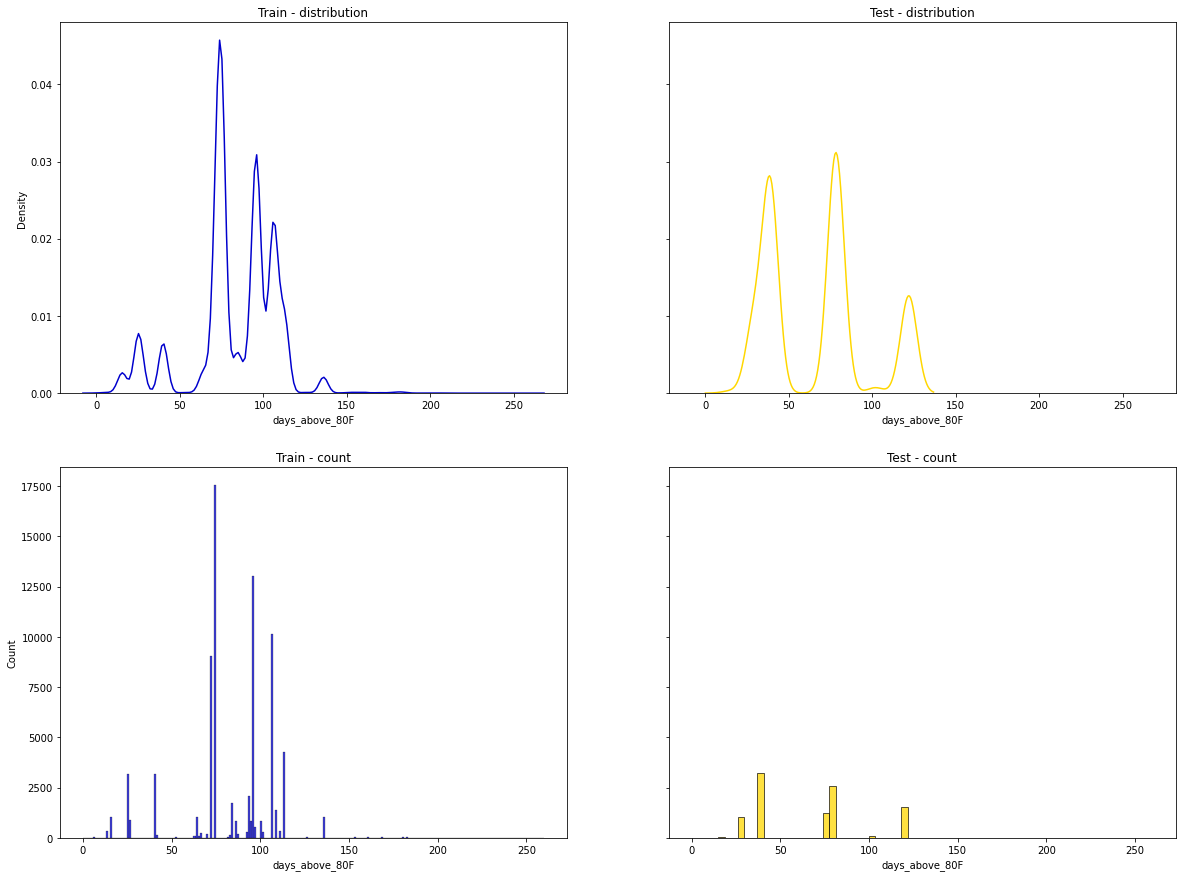

In [ ]:
graph_plotter('days_above_80F')

**Skewness**

-0.6294434248887384
-3.554802253428558


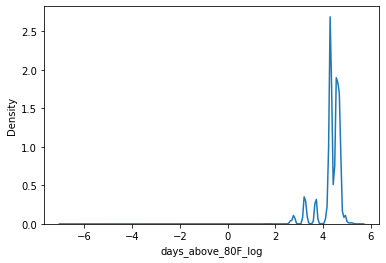

In [ ]:
print(train['days_above_80F'].skew())

temp = train.copy()
temp["days_above_80F_log"] = np.log(train["days_above_80F"]+0.001)
sns.kdeplot(temp['days_above_80F_log'])

#log transformation
print(temp["days_above_80F_log"].skew())

#### Days above 90

Check hier de outliers: train heeft een median en 3rd quartiel rond de 17 en een max van 185!

In [ ]:
#dqr train
numerical_train.loc[['days_above_90F']]

Data Type Records Unique Values  Missing Values  Missing %  \
days_above_90F     int64   75757            87               0        0.0   

                Mean Value Minimum Value  1st Quartile  Median  3rd Quartile  \
days_above_90F        14.1             0           6.0    12.0          17.0   

               Maximum Value  
days_above_90F           185

In [ ]:
#dqr test
numerical_test.loc[['days_above_90F']]

Data Type Records Unique Values  Missing Values  Missing %  \
days_above_90F     int64    9705             7               0        0.0   

                Mean Value Minimum Value  1st Quartile  Median  3rd Quartile  \
days_above_90F        11.9             1           3.0     5.0          12.0   

               Maximum Value  
days_above_90F            41

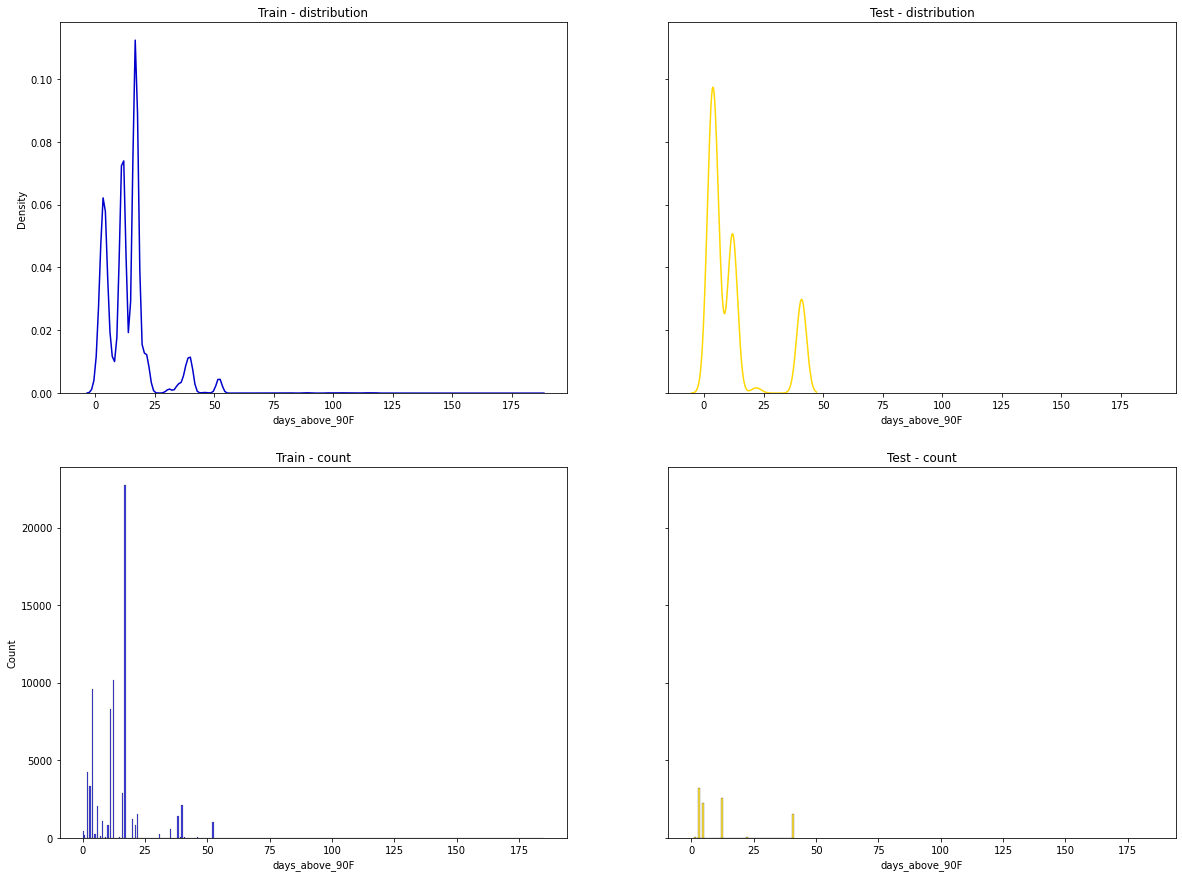

In [ ]:
graph_plotter('days_above_90F')

**Skewness**

3.1334254641584693
-4.076117888769634


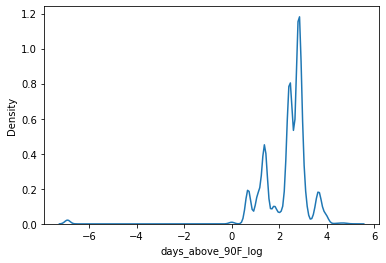

In [ ]:
print(train['days_above_90F'].skew())

temp = train.copy()
temp["days_above_90F_log"] = np.log(train["days_above_90F"]+0.001)
sns.kdeplot(temp['days_above_90F_log'])

#log transformation
print(temp["days_above_90F_log"].skew())

#### Days above 100

In [ ]:
#dqr train
numerical_train.loc[['days_above_100F']]

Data Type Records Unique Values  Missing Values  Missing %  \
days_above_100F     int64   75757            40               0        0.0   

                 Mean Value Minimum Value  1st Quartile  Median  3rd Quartile  \
days_above_100F         0.3             0           0.0     0.0           0.0   

                Maximum Value  
days_above_100F           119

In [ ]:
#dqr test
numerical_test.loc[['days_above_100F']]

Data Type Records Unique Values  Missing Values  Missing %  \
days_above_100F     int64    9705             2               0        0.0   

                 Mean Value Minimum Value  1st Quartile  Median  3rd Quartile  \
days_above_100F         0.2             0           0.0     0.0           0.0   

                Maximum Value  
days_above_100F             2

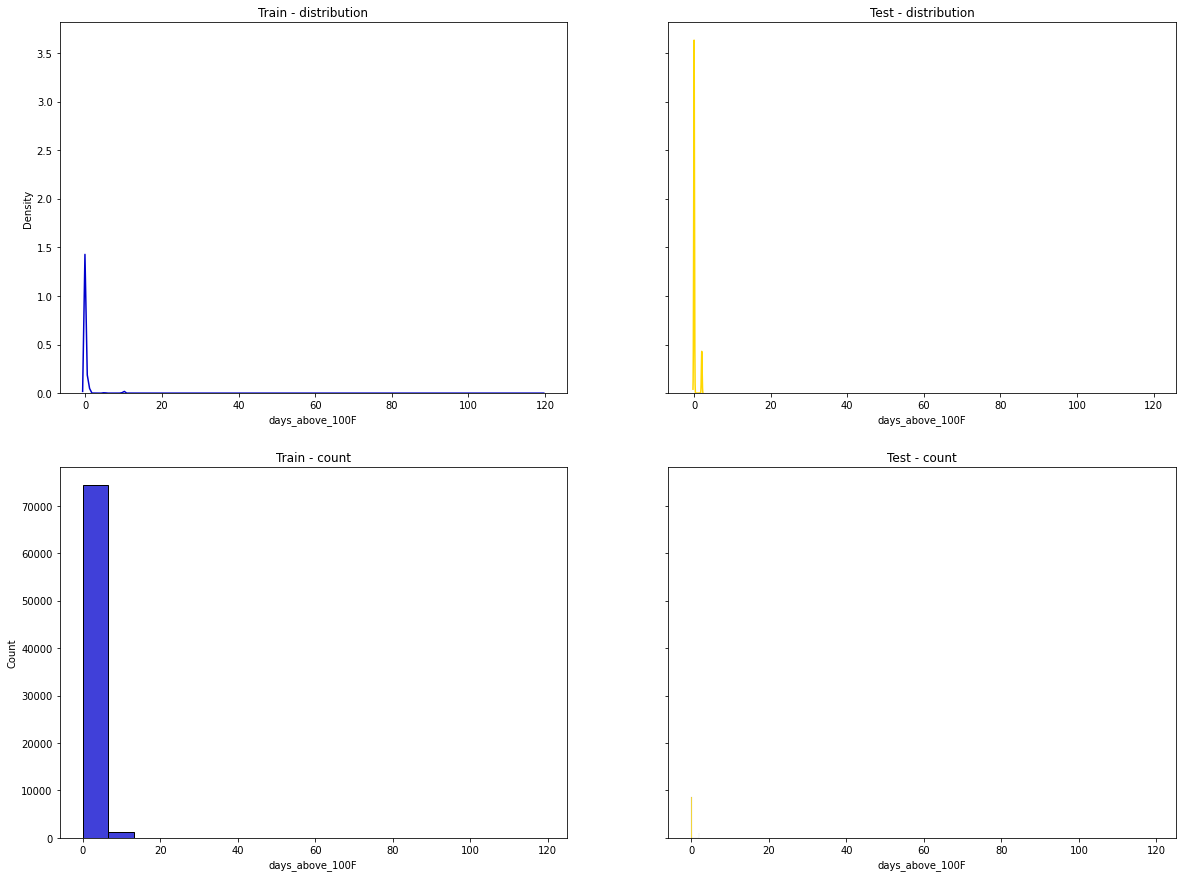

In [ ]:
graph_plotter('days_above_100F')

**Skewness**

23.49621070370435
4.116975933243245


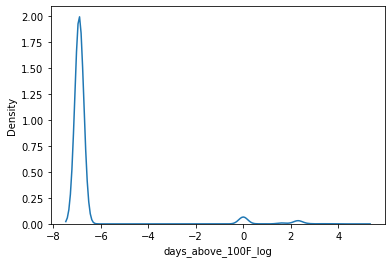

In [ ]:
print(train['days_above_100F'].skew())

temp = train.copy()
temp["days_above_100F_log"] = np.log(train["days_above_100F"]+0.001)
sns.kdeplot(temp['days_above_100F_log'])

#log transformation
print(temp["days_above_100F_log"].skew())

#### Days above 110

In [ ]:
#dqr train
numerical_train.loc[['days_above_110F']]

Data Type Records Unique Values  Missing Values  Missing %  \
days_above_110F     int64   75757             9               0        0.0   

                 Mean Value Minimum Value  1st Quartile  Median  3rd Quartile  \
days_above_110F         0.0             0           0.0     0.0           0.0   

                Maximum Value  
days_above_110F            16

In [ ]:
#dqr test
numerical_test.loc[['days_above_110F']]

Data Type Records Unique Values  Missing Values  Missing %  \
days_above_110F     int64    9705             1               0        0.0   

                 Mean Value Minimum Value  1st Quartile  Median  3rd Quartile  \
days_above_110F         0.0             0           0.0     0.0           0.0   

                Maximum Value  
days_above_110F             0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


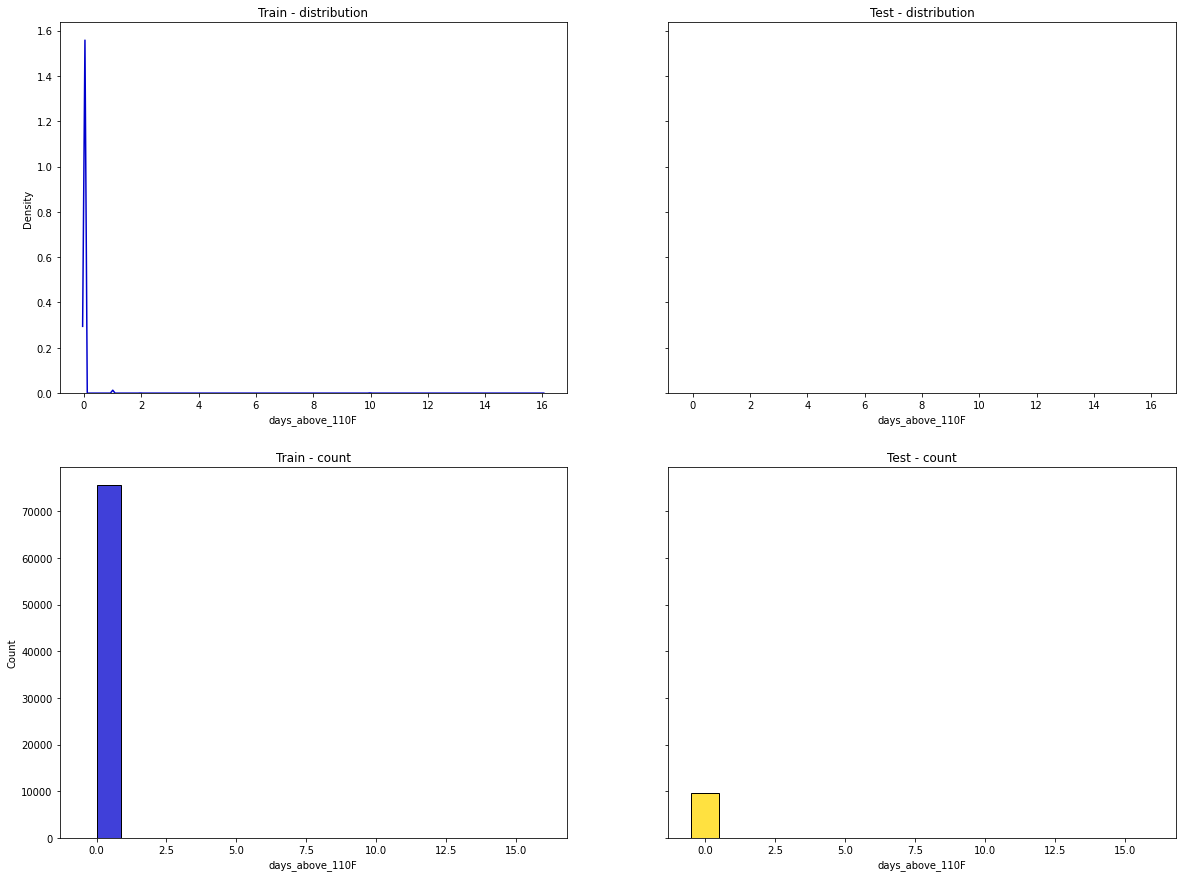

In [ ]:
graph_plotter('days_above_110F')

**Skewness**

84.61571191358485
36.038030759463396


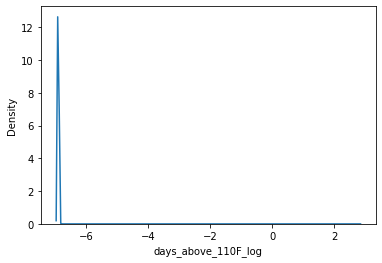

In [ ]:
print(train['days_above_110F'].skew())

temp = train.copy()
temp["days_above_110F_log"] = np.log(train["days_above_110F"]+0.001)
sns.kdeplot(temp['days_above_110F_log'])

#log transformation
print(temp["days_above_110F_log"].skew())

#### Direction max wind speed

In [ ]:
#dqr train
numerical_train.loc[['direction_max_wind_speed']]

Data Type Records Unique Values  Missing Values  \
direction_max_wind_speed   float64   34675            10           41082   

                          Missing %  Mean Value Minimum Value  1st Quartile  \
direction_max_wind_speed       54.2        66.6           1.0           1.0   

                          Median  3rd Quartile Maximum Value  
direction_max_wind_speed     1.0           1.0         360.0

In [ ]:
#dqr test
numerical_test.loc[['direction_max_wind_speed']]

Data Type Records Unique Values  Missing Values  \
direction_max_wind_speed   float64    1130             6            8575   

                          Missing %  Mean Value Minimum Value  1st Quartile  \
direction_max_wind_speed       88.4       321.7         280.0         310.0   

                          Median  3rd Quartile Maximum Value  
direction_max_wind_speed   330.0         340.0         360.0

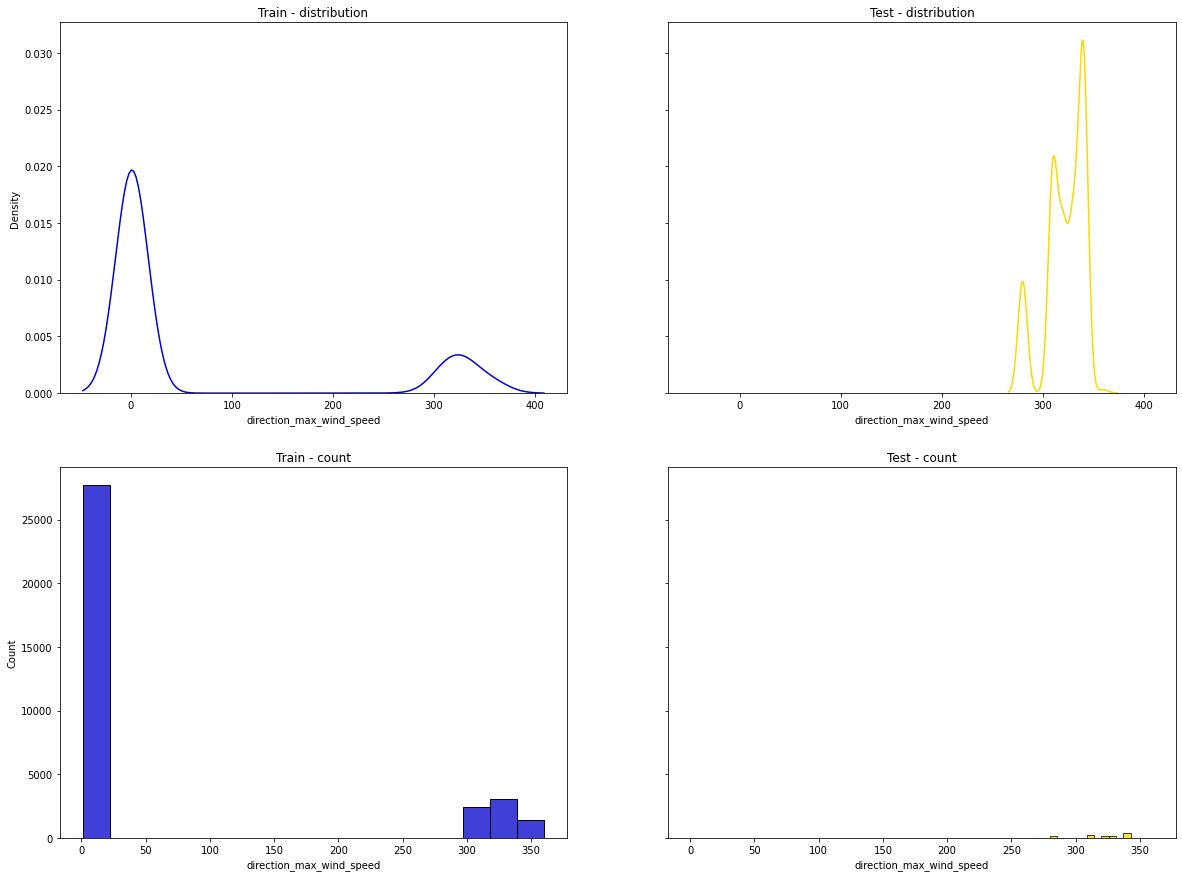

In [ ]:
graph_plotter('direction_max_wind_speed')

**Skewness**

1.5097362330425166
1.4968476433093678


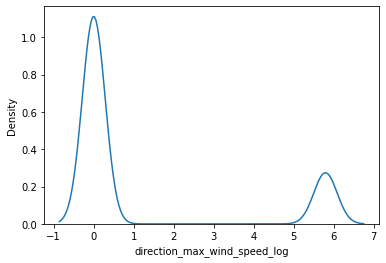

In [ ]:
print(train['direction_max_wind_speed'].skew())

temp = train.copy()
temp["direction_max_wind_speed_log"] = np.log(train["direction_max_wind_speed"]+0.001)
sns.kdeplot(temp['direction_max_wind_speed_log'])

#log transformation
print(temp["direction_max_wind_speed_log"].skew())

#### Direction peak wind speed

In [ ]:
#dqr train
numerical_train.loc[['direction_peak_wind_speed']]

Data Type Records Unique Values  Missing Values  \
direction_peak_wind_speed   float64   33946             8           41811   

                           Missing %  Mean Value Minimum Value  1st Quartile  \
direction_peak_wind_speed       55.2        62.8           1.0           1.0   

                           Median  3rd Quartile Maximum Value  
direction_peak_wind_speed     1.0           1.0         360.0

In [ ]:
#dqr test
numerical_test.loc[['direction_peak_wind_speed']]

Data Type Records Unique Values  Missing Values  \
direction_peak_wind_speed   float64    1130             6            8575   

                           Missing %  Mean Value Minimum Value  1st Quartile  \
direction_peak_wind_speed       88.4       310.2         240.0         270.0   

                           Median  3rd Quartile Maximum Value  
direction_peak_wind_speed   320.0         340.0         350.0

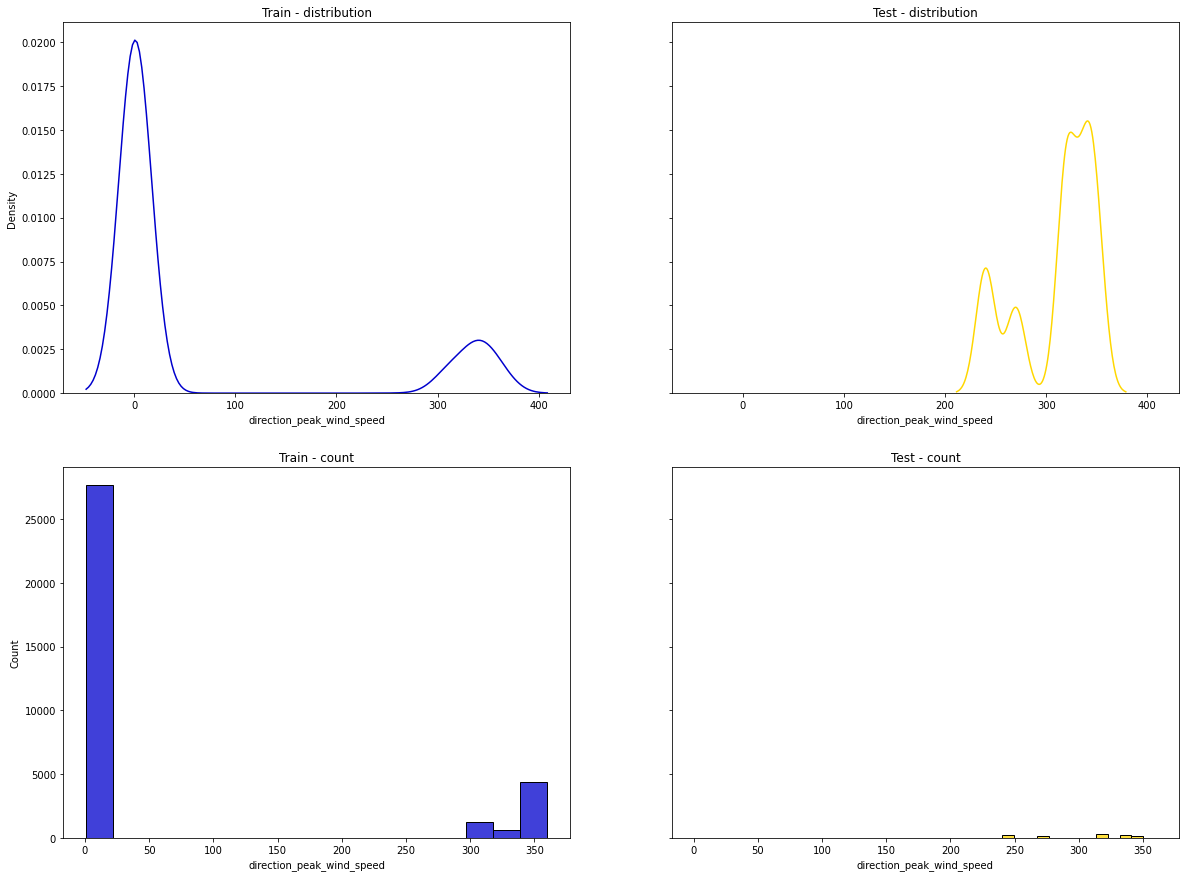

In [ ]:
graph_plotter('direction_peak_wind_speed')


**skewness**

1.6435203204601905
1.63125533702345


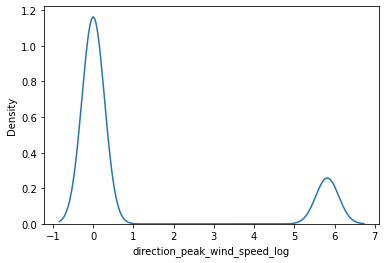

In [ ]:
print(train['direction_peak_wind_speed'].skew())

temp = train.copy()
temp["direction_peak_wind_speed_log"] = np.log(train["direction_peak_wind_speed"]+0.001)
sns.kdeplot(temp['direction_peak_wind_speed_log'])

#log transformation
print(temp["direction_peak_wind_speed_log"].skew())

Max wind speed

In [ ]:
#dqr train
numerical_train.loc[['max_wind_speed']]

Data Type Records Unique Values  Missing Values  Missing %  \
max_wind_speed   float64   34675            16           41082       54.2   

                Mean Value Minimum Value  1st Quartile  Median  3rd Quartile  \
max_wind_speed         4.2           1.0           1.0     1.0           1.0   

               Maximum Value  
max_wind_speed          23.3

In [ ]:
#dqr test
numerical_test.loc[['max_wind_speed']]

Data Type Records Unique Values  Missing Values  Missing %  \
max_wind_speed   float64    1130            10            8575       88.4   

                Mean Value Minimum Value  1st Quartile  Median  3rd Quartile  \
max_wind_speed        18.1          14.8          16.5    18.3          19.2   

               Maximum Value  
max_wind_speed          23.3

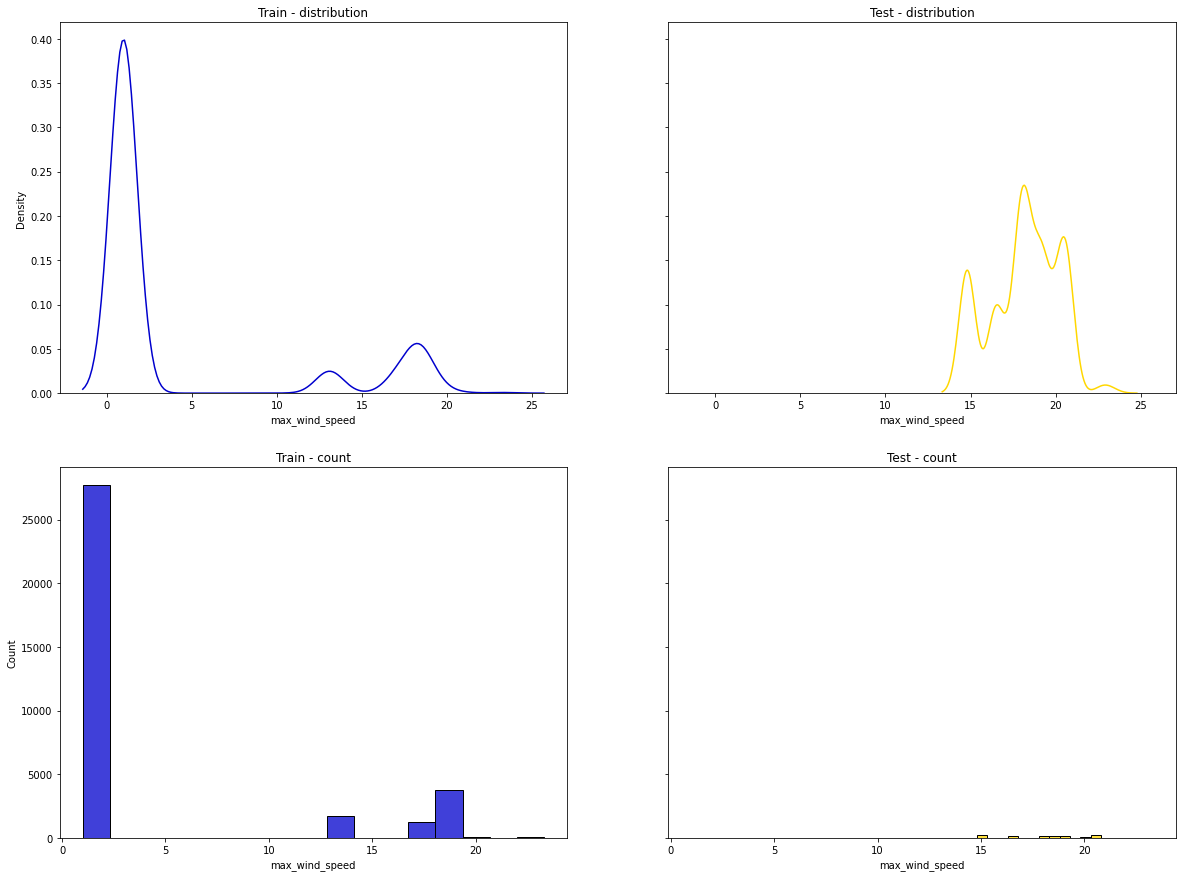

In [ ]:
graph_plotter('max_wind_speed')

**skewness**

1.5876141993584987
1.5090804049516078


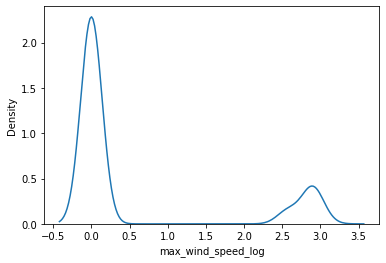

In [ ]:
print(train['max_wind_speed'].skew())

temp = train.copy()
temp["max_wind_speed_log"] = np.log(train["max_wind_speed"]+0.001)
sns.kdeplot(temp['max_wind_speed_log'])

#log transformation
print(temp["max_wind_speed_log"].skew())

#### Days with fog

In [ ]:
#dqr train
numerical_train.loc[['days_with_fog']]

Data Type Records Unique Values  Missing Values  Missing %  \
days_with_fog   float64   29961            42           45796       60.5   

               Mean Value Minimum Value  1st Quartile  Median  3rd Quartile  \
days_with_fog       109.1          12.0          88.0   104.0         131.0   

              Maximum Value  
days_with_fog         311.0

In [ ]:
#dqr test
numerical_test.loc[['days_with_fog']]

Data Type Records Unique Values  Missing Values  Missing %  \
days_with_fog   float64     588             7            9117       93.9   

               Mean Value Minimum Value  1st Quartile  Median  3rd Quartile  \
days_with_fog       150.8          34.0         129.0   129.0         138.0   

              Maximum Value  
days_with_fog         250.0

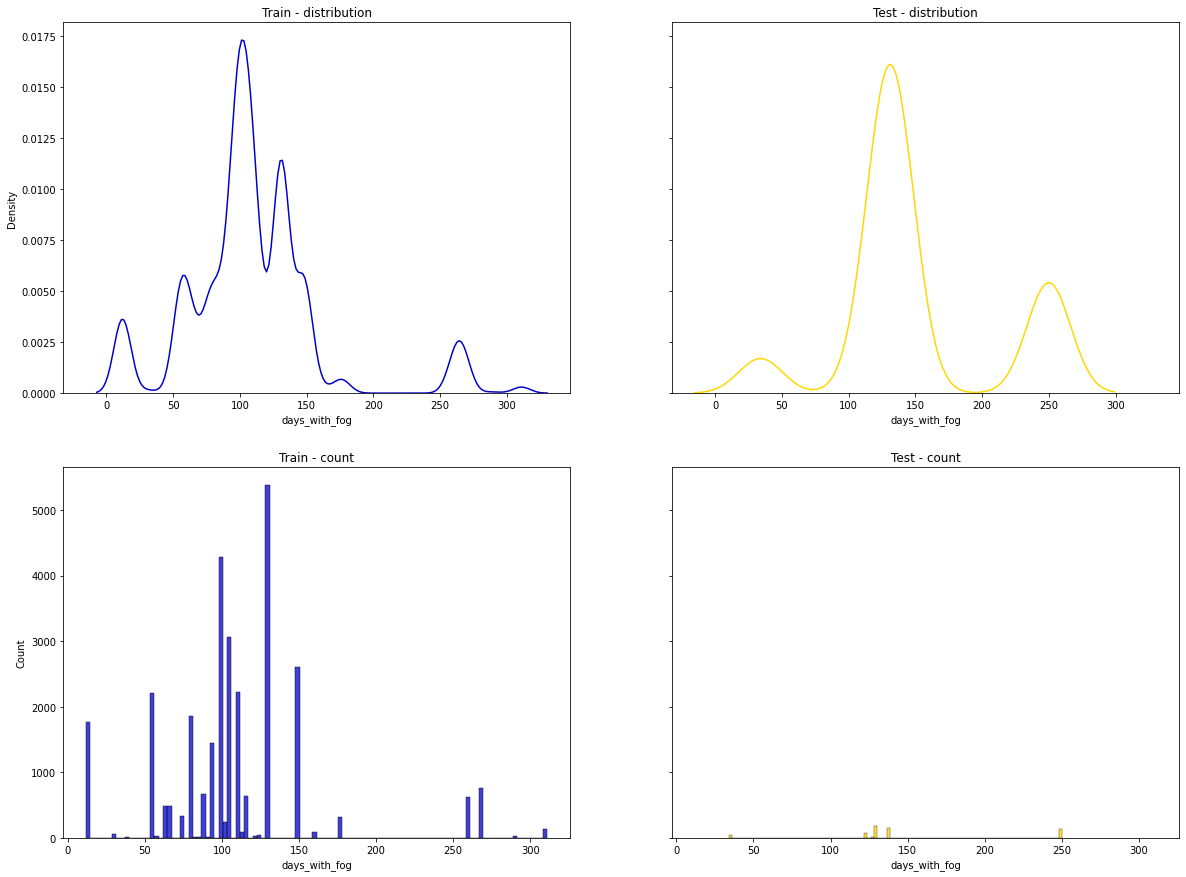

In [ ]:
graph_plotter('days_with_fog')

#### Site_eui

In [ ]:
#dqr train
numerical_train.loc[['site_eui']]

Data Type Records Unique Values  Missing Values  Missing %  \
site_eui   float64   75757         61080               0        0.0   

          Mean Value Minimum Value  1st Quartile  Median  3rd Quartile  \
site_eui        82.6      1.001169          54.5    75.3          97.3   

         Maximum Value  
site_eui     997.86612

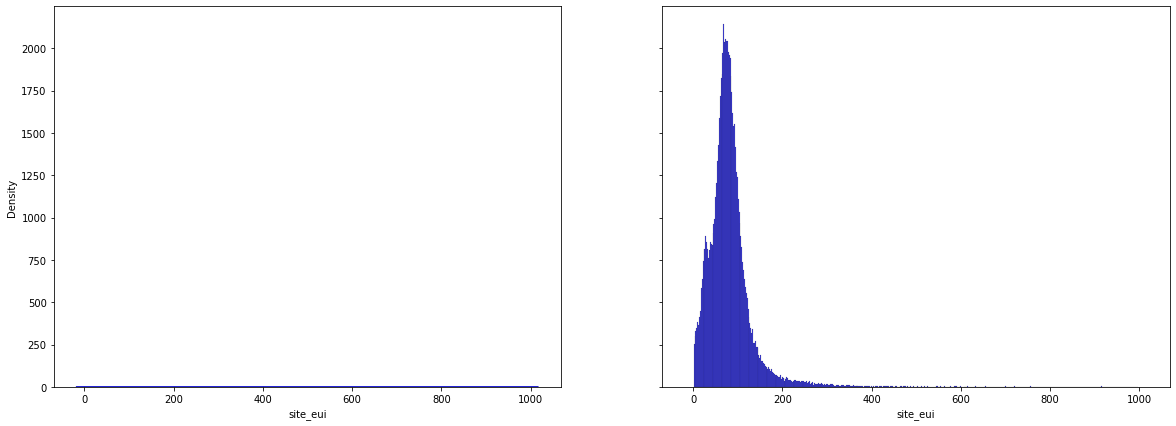

In [ ]:
fig, axes = plt.subplots(1, 2,  figsize=(20, 7), sharey='row', sharex = 'row')
sns.kdeplot(train['site_eui'],  ax = axes[0], fill = False, color = 'mediumblue')
sns.histplot(train['site_eui'],  ax = axes[1] , color = 'mediumblue'  )
plt.show()

**Skeweness**

4.739972264741652
-1.2616644990624244


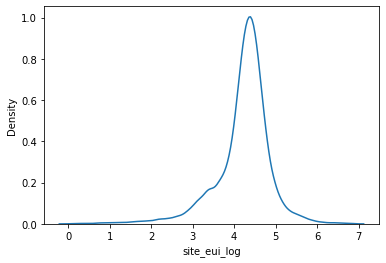

In [ ]:
print(train['site_eui'].skew())

temp = train.copy()
temp["site_eui_log"] = np.log(train["site_eui"]+0.001)
sns.kdeplot(temp['site_eui_log'])

#log transformation
print(temp["site_eui_log"].skew())

#### State factor

In [ ]:
#dqr train
categorical_train.loc[['State_Factor']]

Data Type Records Unique Values  Missing Values  Missing %  \
State_Factor    object   85462             7               0        0.0   

                 Mode  Mode freq.  Mode %  
State_Factor  State_6       50840    59.5

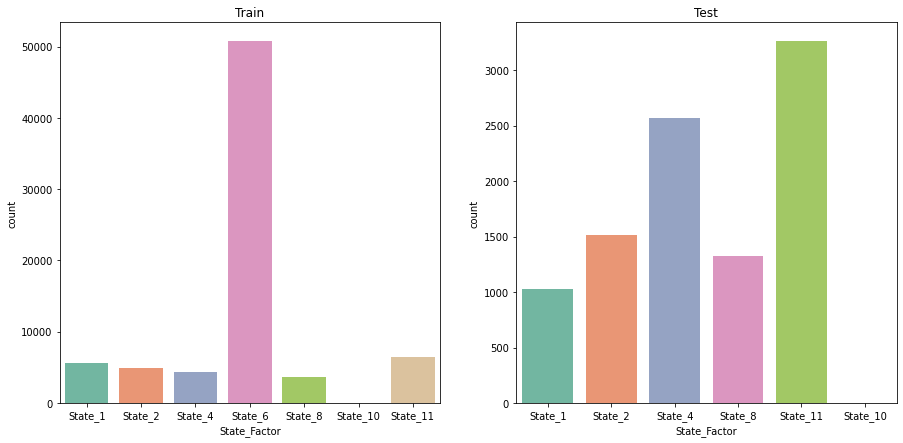

In [ ]:
fig, axes = plt.subplots(1, 2,  figsize=(15, 7) )

#plot
sns.countplot(data=train, x = train['State_Factor'], ax = axes[0], palette = 'Set2')
sns.countplot(data=train, x = test['State_Factor'], ax = axes[1], palette = 'Set2')

#labels
axes[0].set(title = 'Train')
axes[1].set(title = 'Test')

plt.show()

In [ ]:
#summary
mean = train.groupby('State_Factor')['site_eui'].mean().round(1)
min = train.groupby('State_Factor')['site_eui'].min().round(1)
max = train.groupby('State_Factor')['site_eui'].max().round(1)
count = train.groupby('State_Factor')['site_eui'].count()
tot = pd.concat([min, mean, max, count], axis=1, keys = ['min', 'mean', 'max', 'count'])
tot

min  mean    max  count
State_Factor                          
State_1        1.2  62.2  910.6   5618
State_10      46.7  68.6  153.1     15
State_11       1.1  54.0  903.7   6412
State_2        1.6  77.9  970.4   4871
State_4        3.5  95.2  854.7   4300
State_6        1.0  87.5  997.9  50840
State_8        1.0  87.4  944.9   3701

#### Building classs

In [ ]:
#dqr train
categorical_train.loc[['building_class']]

Data Type Records Unique Values  Missing Values  Missing %  \
building_class    object   85462             2               0        0.0   

                       Mode  Mode freq.  Mode %  
building_class  Residential       47656    55.8

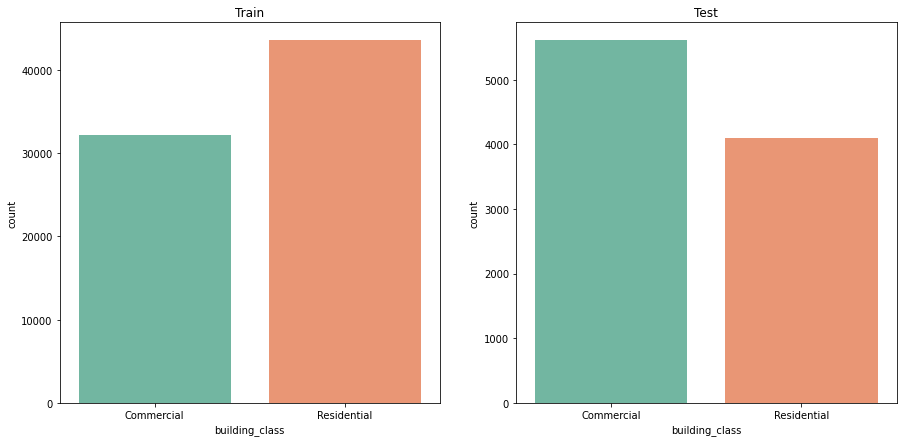

In [ ]:
fig, axes = plt.subplots(1, 2,  figsize=(15, 7) )

#plot
sns.countplot(data=train, x = train['building_class'], ax = axes[0], palette = 'Set2')
sns.countplot(data=train, x = test['building_class'], ax = axes[1], palette = 'Set2')

#labels
axes[0].set(title = 'Train')
axes[1].set(title = 'Test')

plt.show()

In [ ]:
#summary
mean = train.groupby('building_class')['site_eui'].mean().round(1)
min = train.groupby('building_class')['site_eui'].min().round(1)
max = train.groupby('building_class')['site_eui'].max().round(1)
count = train.groupby('building_class')['site_eui'].count()
tot = pd.concat([min, mean, max, count], axis=1, keys = ['min', 'mean', 'max', 'count'])
tot

min  mean    max  count
building_class                         
Commercial      1.0  85.8  997.9  32199
Residential     1.0  80.2  993.4  43558

#### Facility Type

In [ ]:
#dqr train
categorical_train.loc[['facility_type']]

Data Type Records Unique Values  Missing Values  Missing %  \
facility_type    object   85462            60               0        0.0   

                                    Mode  Mode freq.  Mode %  
facility_type  Multifamily_Uncategorized       41654    48.7

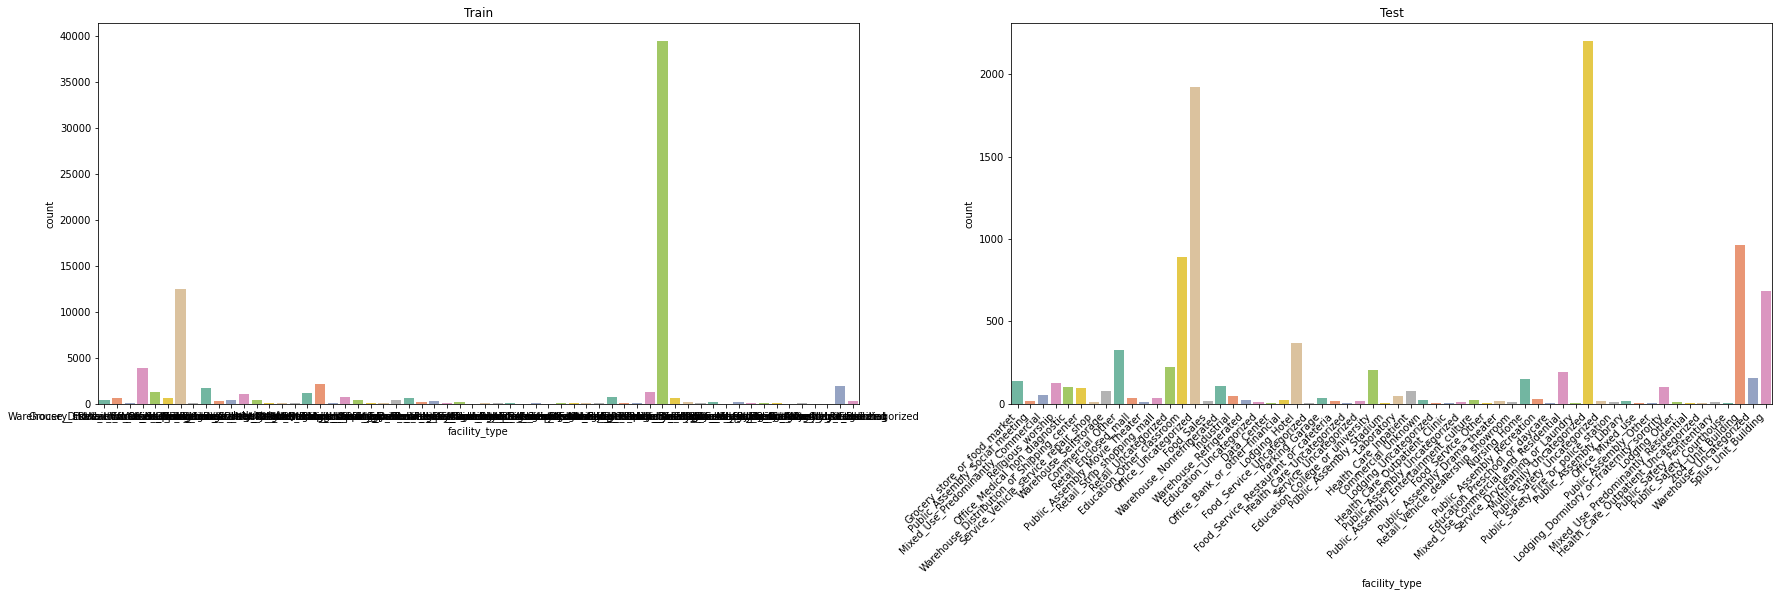

In [ ]:
fig, axes = plt.subplots(1, 2,  figsize=(30, 7) )

#plot
sns.countplot(data=train, x = train['facility_type'], ax = axes[0], palette = 'Set2')
sns.countplot(data=train, x = test['facility_type'], ax = axes[1], palette = 'Set2')

#labels
axes[0].set(title = 'Train')
axes[1].set(title = 'Test')
plt.xticks(rotation=45, ha='right')

plt.show()

In [ ]:
#summary
mean = train.groupby('facility_type')['site_eui'].mean().round(1)
min = train.groupby('facility_type')['site_eui'].min().round(1)
max = train.groupby('facility_type')['site_eui'].max().round(1)
count = train.groupby('facility_type')['site_eui'].count()
tot = pd.concat([min, mean, max, count], axis=1, keys = ['min', 'mean', 'max', 'count'])
tot

min   mean    max  count
facility_type                                                       
2to4_Unit_Building                          5.1   31.9  149.5   1893
5plus_Unit_Building                        10.3   36.7  159.7   1273
Commercial_Other                            1.2   92.6  948.8   1744
Commercial_Unknown                         12.0  113.2  388.9     95
Data_Center                                21.7  339.7  829.6     27
Education_College_or_university             1.8  108.6  989.9   1056
Education_Other_classroom                   2.4   69.4  819.1   3860
Education_Preschool_or_daycare              6.1   61.0  203.0    108
Education_Uncategorized                     3.6   46.2  910.6    709
Food_Sales                                  1.4  136.8  855.2     70
Food_Service_Other                         16.2   29.2   51.5     17
Food_Service_Restaurant_or_cafeteria       18.4  195.6  455.3     64
Food_Service_Uncategorized                 54.0  128.8  229.7     18
Grocery_store_or_food_market               18.7  241.1  690.6    448
Health_Care_Inpatient                      23.9  248.3  887.9    409
Health_Care_Outpatient_Clinic               9.4  103.6  366.8     56
Health_Care_Outpatient_Uncategorized       14.5  189.9  455.5     36
Health_Care_Uncategorized                   2.0  183.9  997.9     51
Industrial                                  1.2  125.3  944.9    384
Laboratory                                 61.8  329.4  782.7    107
Lodging_Dormitory_or_fraternity_sorority    1.1   81.6  351.4    669
Lodging_Hotel                               3.0  104.9  935.4   2098
Lodging_Other                               1.7  121.0  359.8     75
Lodging_Uncategorized                      42.0   66.6   89.2      5
Mixed_Use_Commercial_and_Residential        1.4   89.5  903.7    672
Mixed_Use_Predominantly_Commercial          2.8   69.1  370.3    256
Mixed_Use_Predominantly_Residential        41.7   81.8  109.2      9
Multifamily_Uncategorized                   1.0   83.9  993.4  39455
Nursing_Home                               11.7  131.3  661.4    772
Office_Bank_or_other_financial             21.1   89.9  362.9    173
Office_Medical_non_diagnostic              16.1  116.8  859.4    447
Office_Mixed_use                           32.6   82.1  123.0     18
Office_Uncategorized                        1.0   77.1  970.4  12512
Parking_Garage                              1.2   67.4  975.5    251
Public_Assembly_Drama_theater               6.2   80.9  233.7     70
Public_Assembly_Entertainment_culture       3.5  118.9  360.2    110
Public_Assembly_Library                     2.0  105.8  547.7    160
Public_Assembly_Movie_Theater              38.1  103.1  195.3     39
Public_Assembly_Other                      10.3  126.7  648.1    142
Public_Assembly_Recreation                 14.1  115.2  354.3     72
Public_Assembly_Social_meeting              1.1   78.9  195.9     88
Public_Assembly_Stadium                    81.0  157.0  275.8      9
Public_Assembly_Uncategorized               2.4   62.9  188.5     25
Public_Safety_Courthouse                   40.7  103.2  233.3     38
Public_Safety_Fire_or_police_station       27.1  131.1  395.8    157
Public_Safety_Penitentiary                 16.5  170.9  408.9     37
Public_Safety_Uncategorized                 9.1   83.7  139.8     43
Religious_worship                           2.3   44.6  178.1    399
Retail_Enclosed_mall                        3.9  101.0  265.9    120
Retail_Strip_shopping_mall                  1.7  110.4  854.7    113
Retail_Uncategorized                        2.3   80.9  593.7   1130
Retail_Vehicle_dealership_showroom          1.4   46.6  187.1     74
Service_Drycleaning_or_Laundry             32.2   42.1   54.5      9
Service_Uncategorized                      16.9  113.6  240.5     68
Service_Vehicle_service_repair_shop         1.2  137.6  724.4    138
Warehouse_Distribution_or_Shipping_center   1.3   39.6  233.5    604
Warehouse_Nonrefrigerated                 

#4 Interactions

In [ ]:
train.head(1)

Year_Factor State_Factor building_class                 facility_type  \
0            1      State_1     Commercial  Grocery_store_or_food_market   

   floor_area  year_built  energy_star_rating  ELEVATION  january_min_temp  \
0     61242.0      1942.0                11.0        2.4                36   

   january_avg_temp  january_max_temp  february_min_temp  february_avg_temp  \
0              50.5                68                 35          50.589286   

   february_max_temp  march_min_temp  march_avg_temp  march_max_temp  \
0                 73              40       53.693548              80   

   april_min_temp  april_avg_temp  april_max_temp  may_min_temp  may_avg_temp  \
0              41            55.5              78            46     56.854839   

   may_max_temp  june_min_temp  june_avg_temp  june_max_temp  july_min_temp  \
0            84             50           60.5             90             52   

   july_avg_temp  july_max_temp  august_min_temp  august_avg_temp  \
0      62.725806             84               52         62.16129   

   august_max_temp  september_min_temp  september_avg_temp  \
0               85                  52               64.65   

   september_max_temp  october_min_temp  october_avg_temp  october_max_temp  \
0                  90                47         63.016129                83   

   november_min_temp  november_avg_temp  november_max_temp  december_min_temp  \
0                 43               53.8                 72                 36   

   december_avg_temp  december_max_temp  cooling_degree_days  \
0          49.274194                 71                  115   

   heating_degree_days  precipitation_inches  snowfall_inches  \
0                 2960                 16.59              0.0   

   snowdepth_inches   avg_temp  days_below_30F  days_below_20F  \
0                 0  56.972603               0               0   

   days_below_10F  days_below_0F  days_above_80F  days_above_90F  \
0               0              0              14               0   

   days_above_100F  days_above_110F  direction_max_wind_speed  \
0                0                0                       1.0   

   direction_peak_wind_speed  max_wind_speed  days_with_fog    site_eui  id  
0                        1.0             1.0            NaN  248.682615   0

#### EUI by year

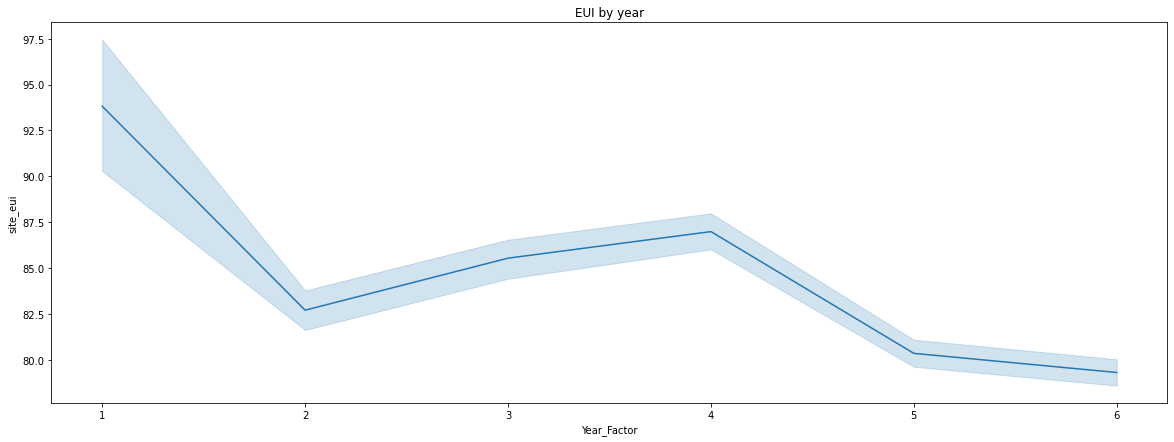

In [ ]:
#plot
fig, axes = plt.subplots(1, 1,  figsize=(20, 7))
ax = sns.lineplot(data = train, x = 'Year_Factor', y = 'site_eui' , palette = 'Set2')
ax.set(title = 'EUI by year')
plt.show()

#### EUI by built year

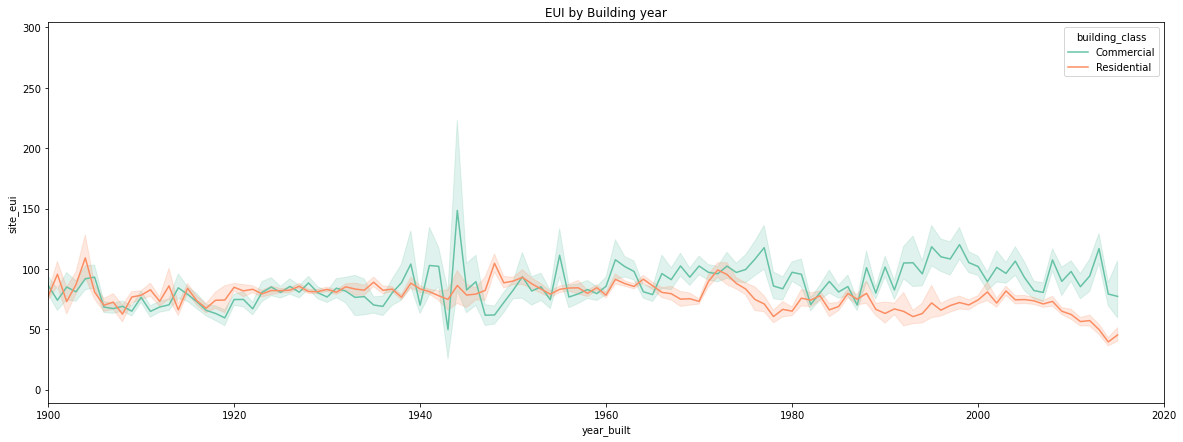

In [ ]:
#plot
fig, axes = plt.subplots(1, 1,  figsize=(20, 7))
ax = sns.lineplot(data = train, x = 'year_built', y = 'site_eui' , palette = 'Set2', hue = 'building_class')
ax.set(title = 'EUI by Building year')
plt.xlim(1900, 2020)
plt.show()

In [ ]:
Lodging_Hotel

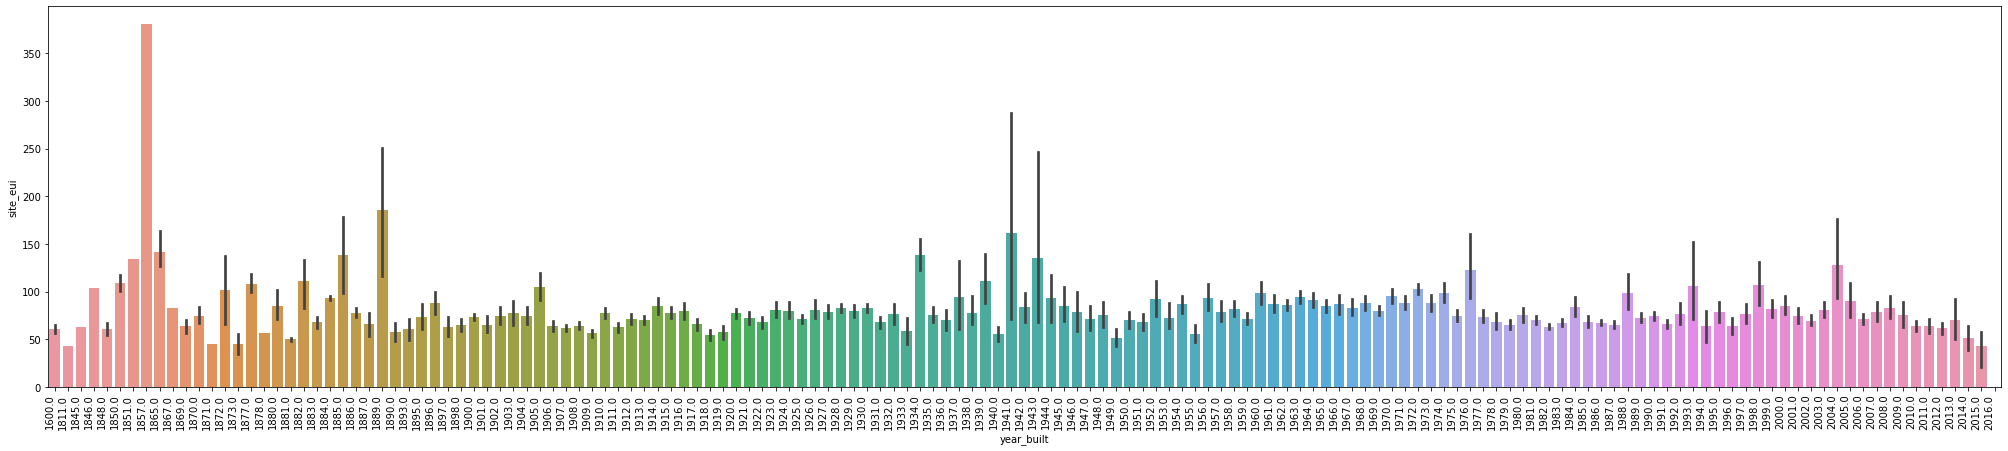

In [ ]:
#plot
fig, axes = plt.subplots(1, 1,  figsize=(35, 7))
sns.barplot(data = raw[raw['facility_type']=='Office_Uncategorized'], x = 'year_built', y = 'site_eui')
plt.xticks(rotation=90, ha='right')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


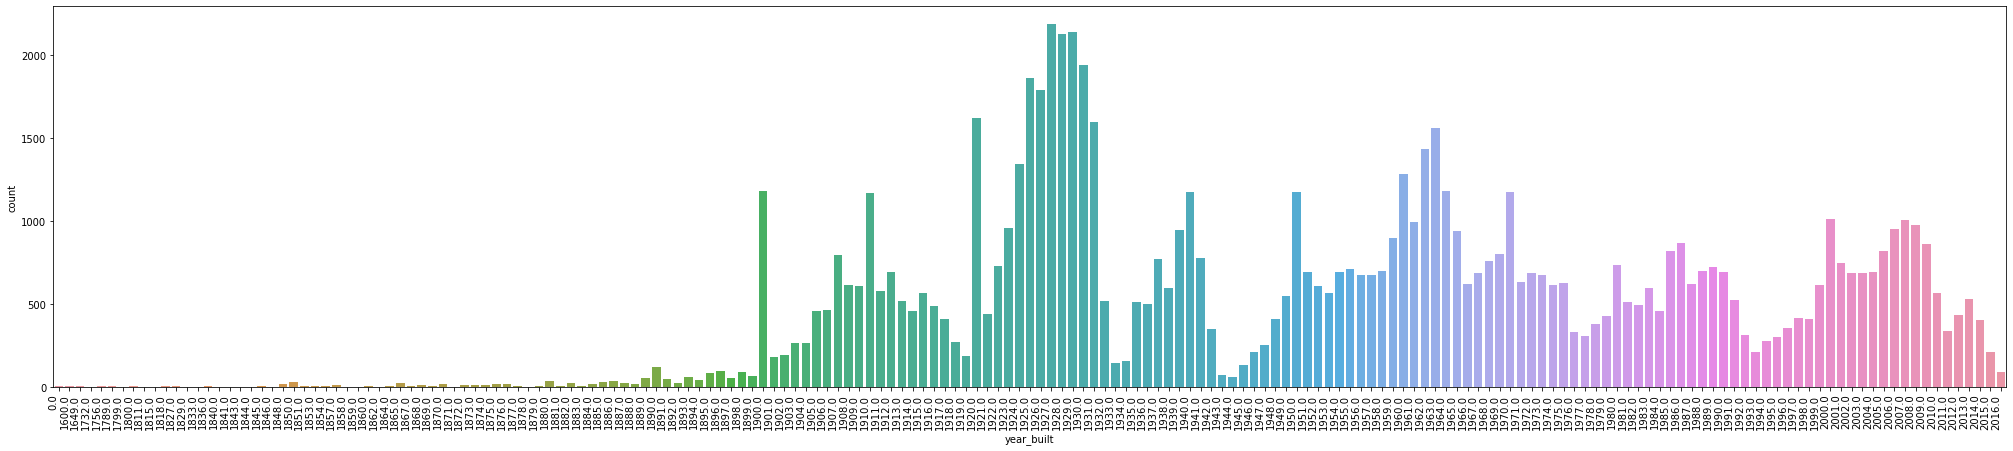

In [ ]:
#plot
fig, axes = plt.subplots(1, 1,  figsize=(35, 7))
sns.countplot(raw['year_built'])
plt.xticks(rotation=90, ha='right')
plt.show()

#### Floor area bij facility type

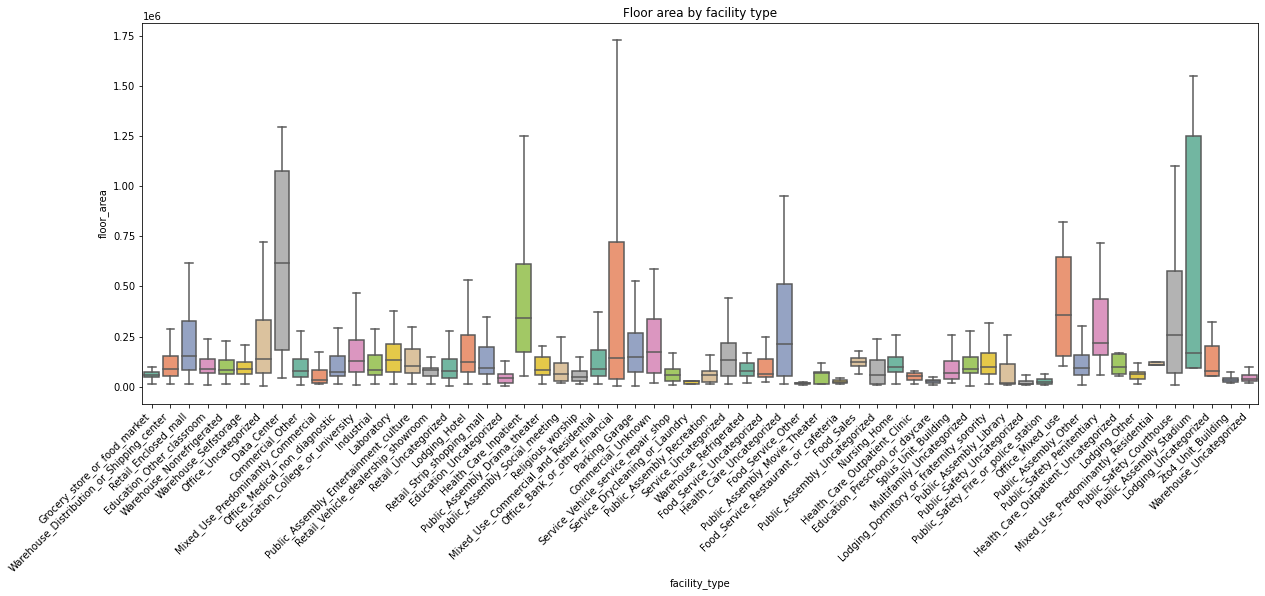

In [ ]:
#plot
fig, axes = plt.subplots(1, 1,  figsize=(20, 7))
ax = sns.boxplot(data = train, x = 'facility_type', y = 'floor_area' , palette = 'Set2', showfliers = False)
ax.set(title = 'Floor area by facility type')
plt.xticks(rotation=45, ha='right')
plt.show()

#### EUI by rating

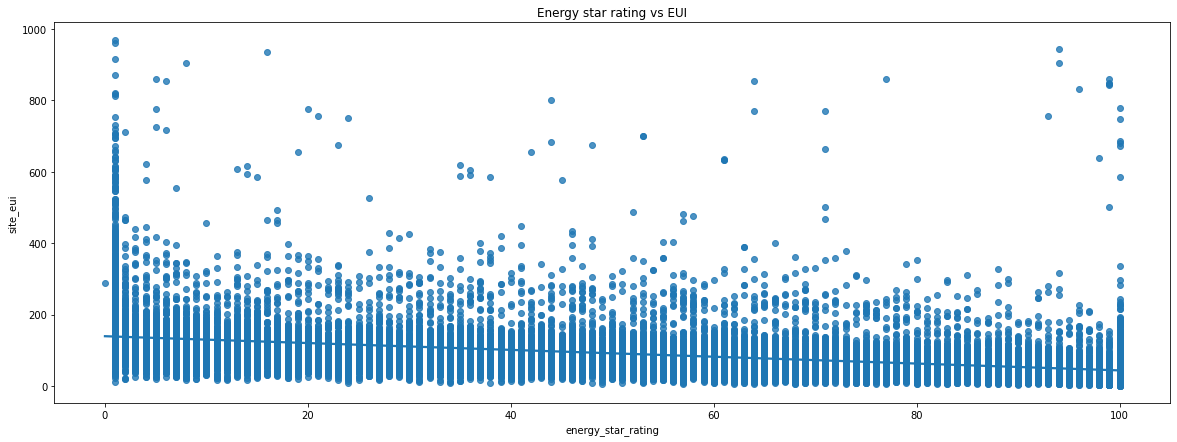

In [ ]:
#plot
fig, axes = plt.subplots(1, 1,  figsize=(20, 7))
ax = sns.regplot(data = train, x = 'energy_star_rating', y = 'site_eui')
ax.set(title = 'Energy star rating vs EUI')
plt.show()

#### Mean temperature month by year

**Mean temperature by month and year**

In [ ]:
#create dataset for training data
avg_temp_train = train[['january_avg_temp', 'february_avg_temp', 'march_avg_temp','april_avg_temp', 'may_avg_temp', 'june_avg_temp', 'july_avg_temp', 'august_avg_temp', 'september_avg_temp', 'october_avg_temp', 'november_avg_temp', 'december_avg_temp', 'Year_Factor', 'State_Factor']]
avg_temp_train_melt = avg_temp_train.melt(id_vars = ['Year_Factor', 'State_Factor'])

#creae month column and re-map
avg_temp_train_melt['month'] = avg_temp_train_melt['variable'].str.split("_").str[0]
di = {'january': 1, 'february': 2, 'march': 3, 'april': 4, 'may': 5, 'june': 6, 'july':7, 'august': 8, 'september':9, 'october': 10, 'november': 11, 'december': 12}
avg_temp_train_melt = avg_temp_train_melt.replace({"month": di})

In [ ]:
#create dataset for training data
avg_temp_test = test[['january_avg_temp', 'february_avg_temp', 'march_avg_temp','april_avg_temp', 'may_avg_temp', 'june_avg_temp', 'july_avg_temp', 'august_avg_temp', 'september_avg_temp', 'october_avg_temp', 'november_avg_temp', 'december_avg_temp', 'Year_Factor', 'State_Factor']]
avg_temp_test_melt = avg_temp_test.melt(id_vars = ['Year_Factor', 'State_Factor'])

#creae month column and re-map
avg_temp_test_melt['month'] = avg_temp_test_melt['variable'].str.split("_").str[0]
di = {'january': 1, 'february': 2, 'march': 3, 'april': 4, 'may': 5, 'june': 6, 'july':7, 'august': 8, 'september':9, 'october': 10, 'november': 11, 'december': 12}
avg_temp_test_melt = avg_temp_test_melt.replace({"month": di})

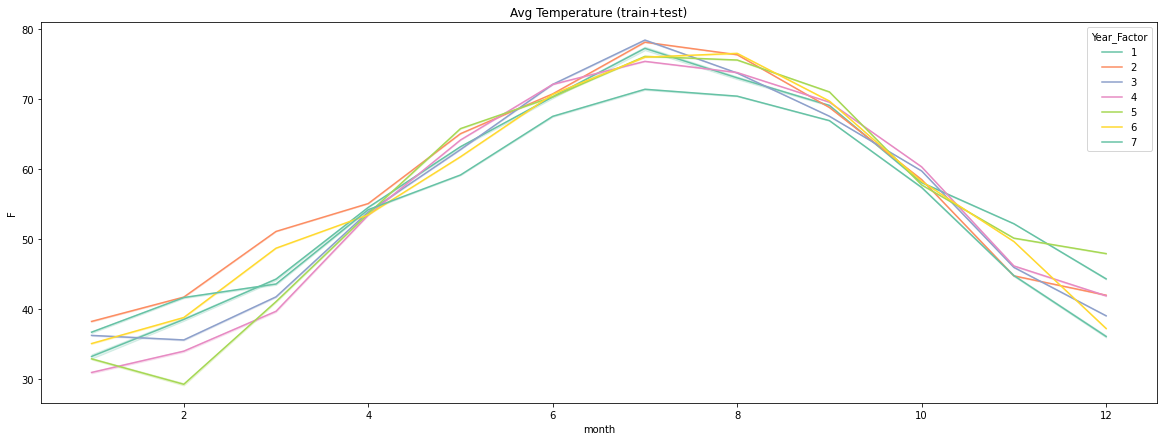

In [ ]:
#plot
fig, axes = plt.subplots(1, 1,  figsize=(20, 7), sharey=True)
ax = sns.lineplot(data = avg_temp_train_melt , x = 'month', y= 'value', hue = 'Year_Factor', palette = 'Set2')
ax = sns.lineplot(data = avg_temp_test_melt , x = 'month', y= 'value', hue = 'Year_Factor', palette = 'Set2')
ax.set(title = 'Avg Temperature (train+test)', ylabel = 'F')
plt.show()

#### Missingness energy star rating

In [ ]:
temp = train.copy()
temp['has_energy_star_rating'] = np.where (temp['energy_star_rating'].isna(), 0, 1)
temp['has_energy_star_rating'].value_counts(normalize=True)

1    0.647439
0    0.352561
Name: has_energy_star_rating, dtype: float64

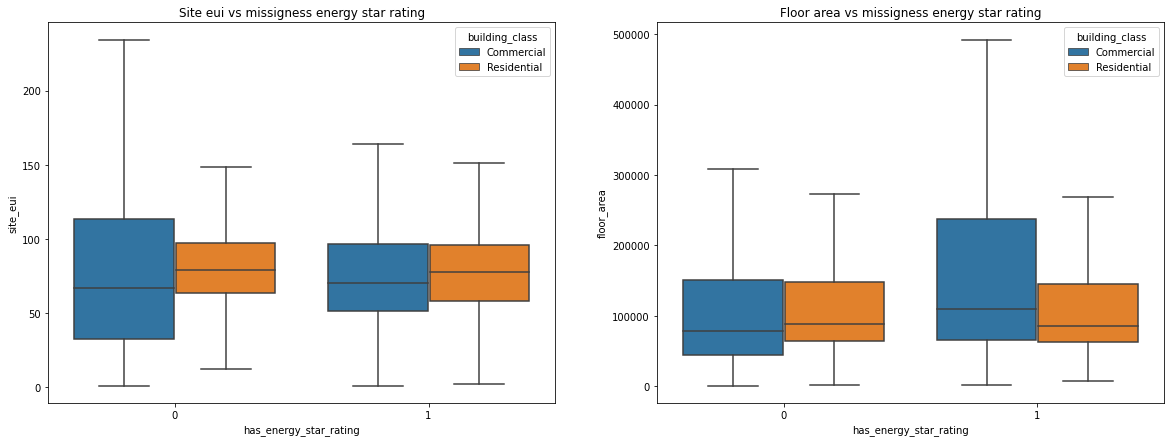

In [ ]:
#even within january of the same year, a lot of variation exists... careful with imputing
fig, axes = plt.subplots(1, 2,  figsize=(20, 7))
sns.boxplot(data = temp, x = 'has_energy_star_rating', y = 'site_eui', ax = axes[0], showfliers = False, hue = 'building_class')
sns.boxplot(data = temp, x = 'has_energy_star_rating', y = 'floor_area', ax = axes[1], showfliers = False, hue = 'building_class')

axes[0].set(title = 'Site eui vs missigness energy star rating')
axes[1].set(title = 'Floor area vs missigness energy star rating')
plt.show()

#### Correlation matrix

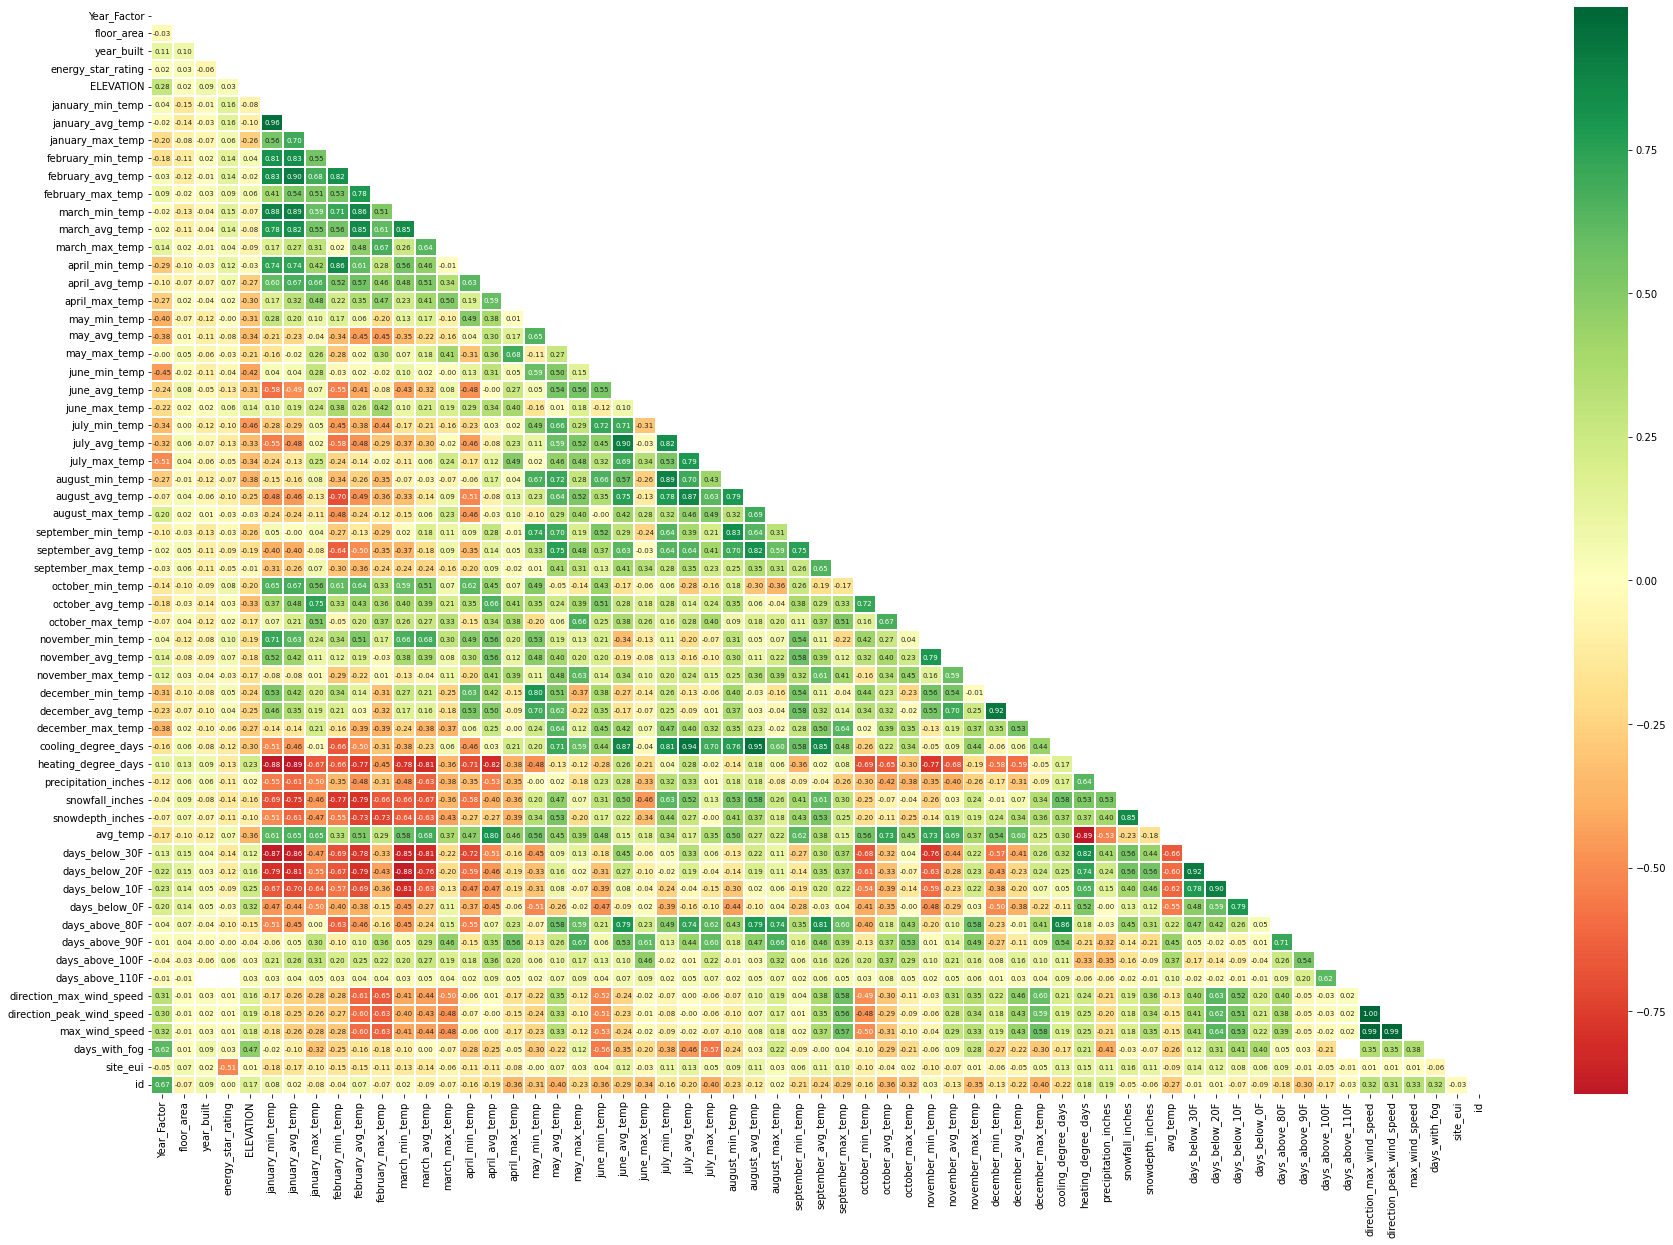

In [ ]:
# Create the correlation matrix
corr_mean = raw.corr(method = 'pearson')

#create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_mean, dtype=bool))

# Add the mask to the heatmap
fig, ax = plt.subplots(figsize=(30,20)) 
ax = sns.heatmap(corr_mean, mask=mask, cmap= "RdYlGn", center=0, linewidths=1, annot=True, fmt=".2f" , annot_kws={"size": 7})
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

# 5 Clustering climate zones

**avg temperature**

In [ ]:
#create a copy of the dataset
climate_zone = raw[['site_eui', 'avg_temp', 'id', 'State_Factor']]

#drop empty records for now
climate_zone = climate_zone.dropna()
climate_zone  = climate_zone.set_index(['id', 'State_Factor'])

#define X and y for training the model
X= climate_zone[['avg_temp']]
y = climate_zone['site_eui']


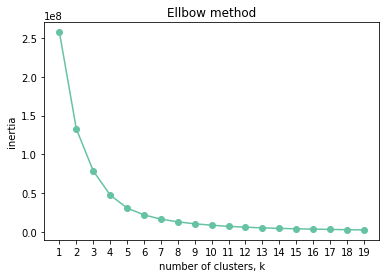

In [ ]:
#Create an ellbow plot to determine the optimal number of clusters
ks = range(1, 20)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    kmeans = KMeans(n_clusters=k).fit(climate_zone)
     
    # Append the inertia to the list of inertias
    inertias.append(kmeans.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o',  color =  '#66c2a5')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.title("Ellbow method")
plt.xticks(ks)
plt.show()

In [ ]:
#fit K means with 3 clusters
kmeans = KMeans(n_clusters=4, random_state =11 )
kmeans.fit(climate_zone)

# Calculate the cluster labels: labels
clusters = kmeans.predict(climate_zone)
climate_zone["climate_cluster"] = clusters
climate_zone.head()

site_eui   avg_temp  climate_cluster
id State_Factor                                        
0  State_1       248.682615  56.972603                1
1  State_1        26.500150  56.972603                2
2  State_1        24.693619  56.972603                2
3  State_1        48.406926  56.972603                2
4  State_1         3.899395  56.972603                2

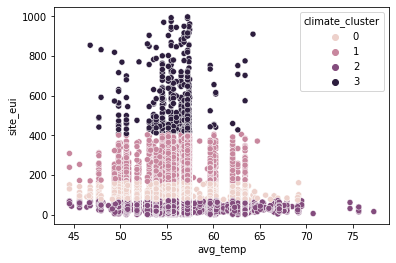

In [ ]:
sns.scatterplot(data = climate_zone, x = 'avg_temp', y = 'site_eui', hue = 'climate_cluster')

# 6 Missing data

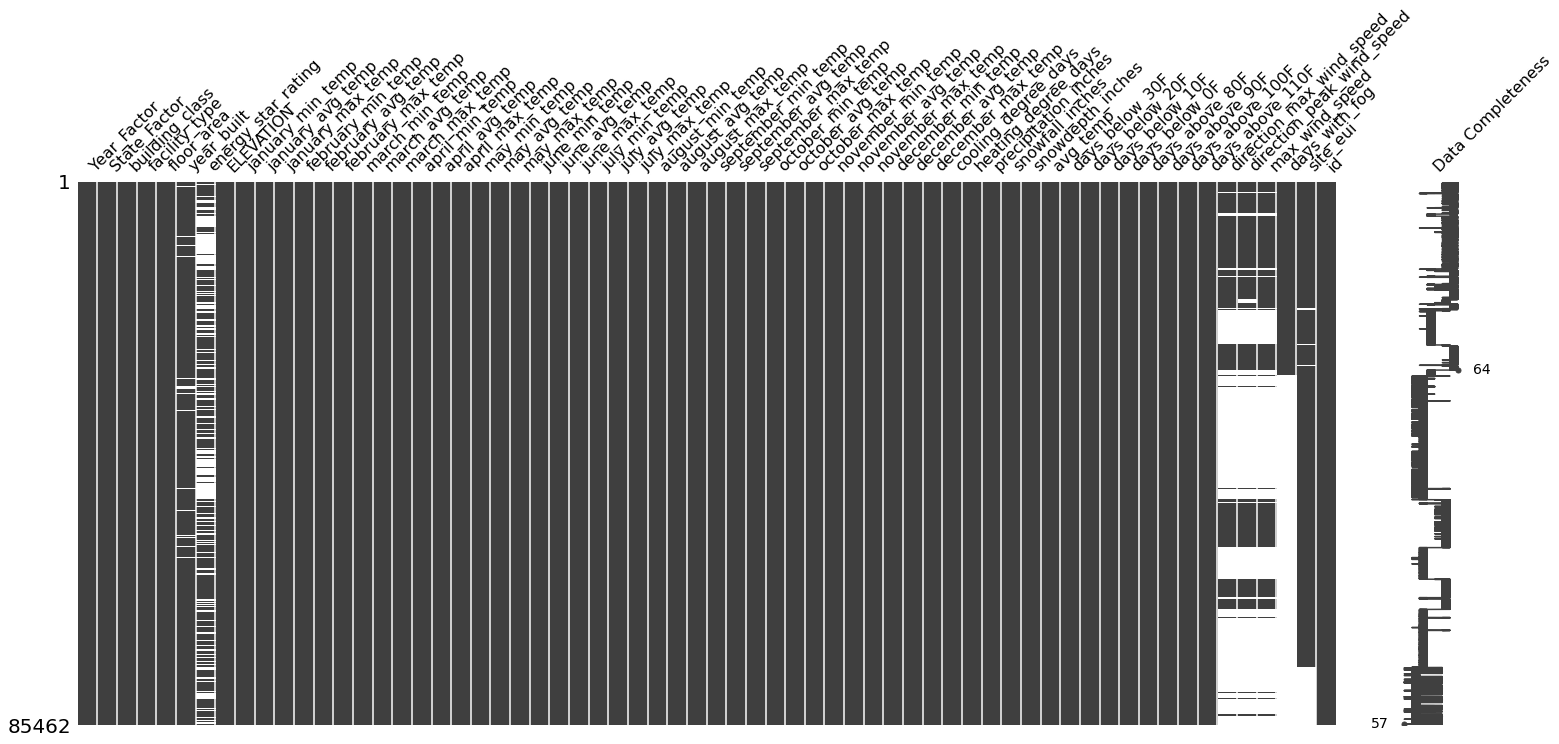

In [ ]:
#there are strong correlations in missingness
sorted =raw.sort_values('days_with_fog')
msno.matrix(sorted, labels=True)
plt.show()

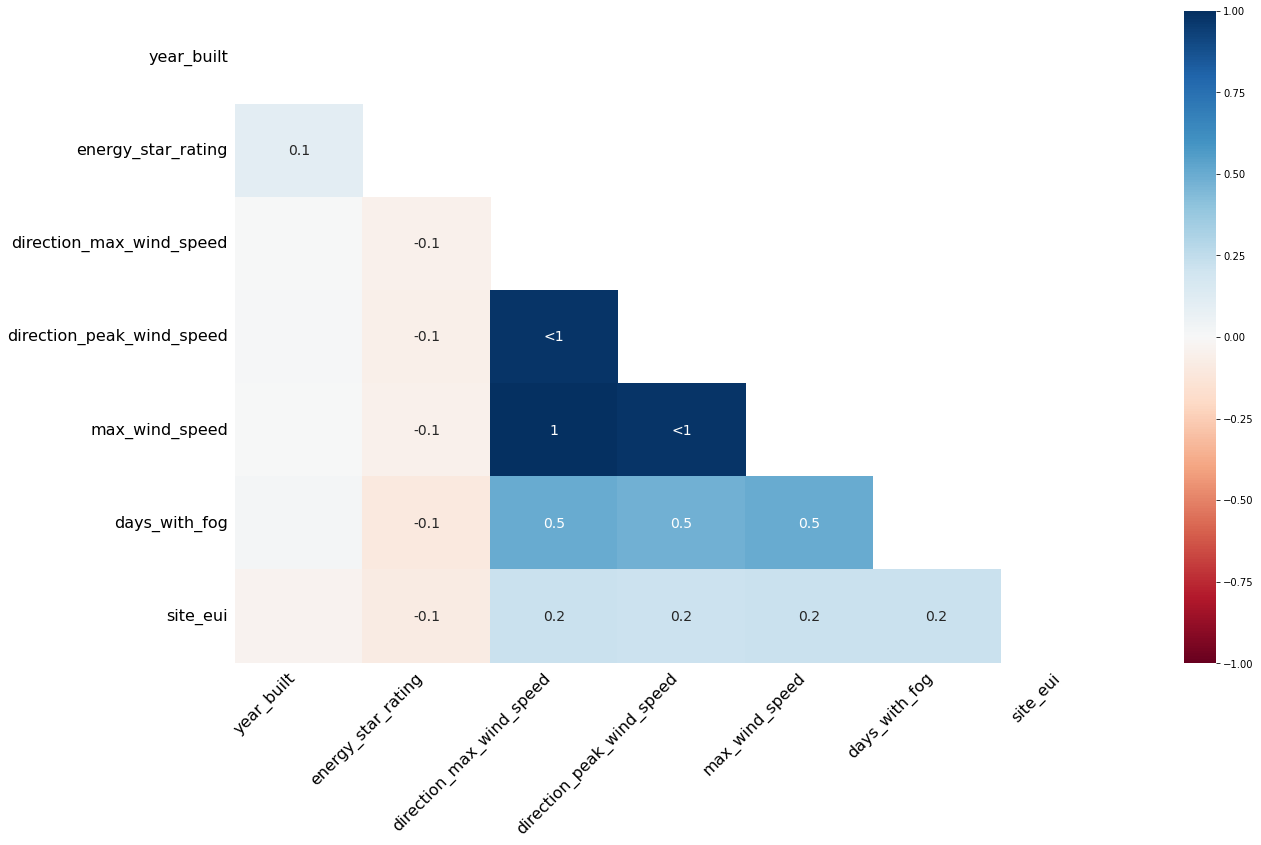

In [ ]:
#strong correlation in missingness
msno.heatmap(raw)